## Importation des données

In [2]:
# Lecture des données
energy <- read.table(paste("DataEnergy.csv", sep = ""),
                    sep = ",", header = TRUE)
# Vérification du contenu
summary(energy)

 Relative.compactness  Surface.area     Wall.area       Roof.area    
 Min.   :0.6125       Min.   :501.4   Min.   :234.3   Min.   :105.3  
 1st Qu.:0.6779       1st Qu.:598.7   1st Qu.:291.8   1st Qu.:137.4  
 Median :0.7517       Median :673.1   Median :315.8   Median :183.3  
 Mean   :0.7645       Mean   :671.3   Mean   :318.3   Mean   :176.5  
 3rd Qu.:0.8350       3rd Qu.:744.6   3rd Qu.:343.0   3rd Qu.:220.5  
 Max.   :0.9912       Max.   :826.0   Max.   :425.8   Max.   :225.8  
 Overall.height orientation         Glazing.area      Glazing.area.distr
 Min.   :3.50   Length:768         Min.   :-0.02401   Min.   :0.000     
 1st Qu.:3.50   Class :character   1st Qu.: 0.10306   1st Qu.:1.750     
 Median :5.25   Mode  :character   Median : 0.24752   Median :3.000     
 Mean   :5.25                      Mean   : 0.23435   Mean   :2.812     
 3rd Qu.:7.00                      3rd Qu.: 0.39119   3rd Qu.:4.000     
 Max.   :7.00                      Max.   : 0.42702   Max.   :5.000     

**Commentaires**: La variable *Glazing.area* contient des valeurs négatives. 

In [3]:
#remove negative values of Glazing.area
energy[energy["Glazing.area"]<0, "Glazing.area"] =0
summary(energy)

 Relative.compactness  Surface.area     Wall.area       Roof.area    
 Min.   :0.6125       Min.   :501.4   Min.   :234.3   Min.   :105.3  
 1st Qu.:0.6779       1st Qu.:598.7   1st Qu.:291.8   1st Qu.:137.4  
 Median :0.7517       Median :673.1   Median :315.8   Median :183.3  
 Mean   :0.7645       Mean   :671.3   Mean   :318.3   Mean   :176.5  
 3rd Qu.:0.8350       3rd Qu.:744.6   3rd Qu.:343.0   3rd Qu.:220.5  
 Max.   :0.9912       Max.   :826.0   Max.   :425.8   Max.   :225.8  
 Overall.height orientation         Glazing.area    Glazing.area.distr
 Min.   :3.50   Length:768         Min.   :0.0000   Min.   :0.000     
 1st Qu.:3.50   Class :character   1st Qu.:0.1031   1st Qu.:1.750     
 Median :5.25   Mode  :character   Median :0.2475   Median :3.000     
 Mean   :5.25                      Mean   :0.2345   Mean   :2.812     
 3rd Qu.:7.00                      3rd Qu.:0.3912   3rd Qu.:4.000     
 Max.   :7.00                      Max.   :0.4270   Max.   :5.000     
     Energy  

# DATA ANALYSIS

## 1. Analyse descriptive unidimentionnelle


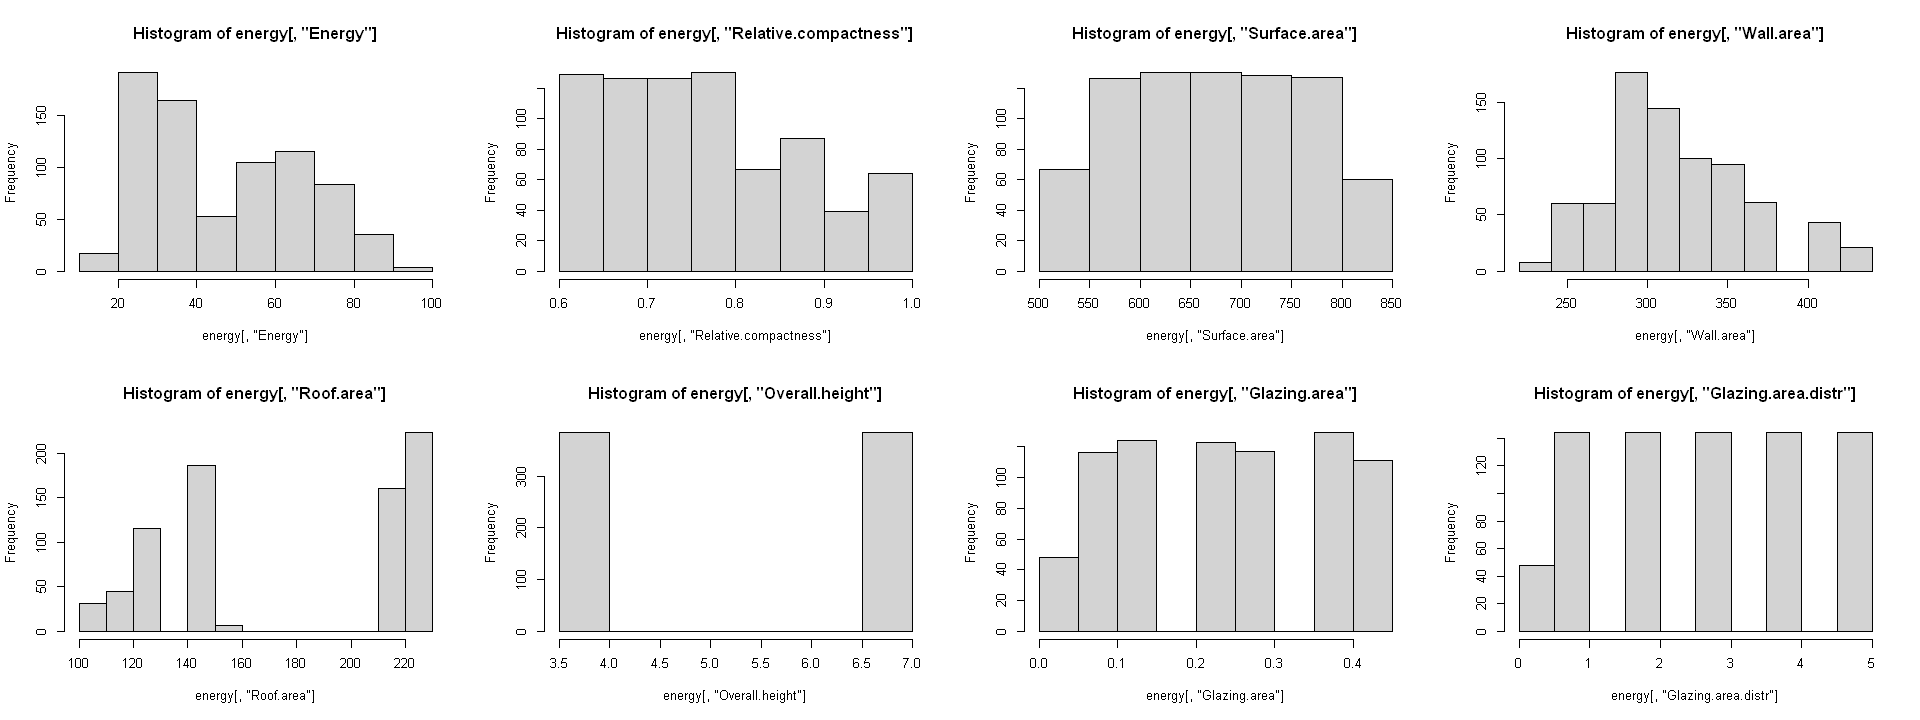

In [4]:
par(mfrow = c(2, 4))
options(repr.plot.width = 16, repr.plot.height = 6)
hist(energy[, "Energy"])
hist(energy[, "Relative.compactness"])
hist(energy[,"Surface.area"]);hist(energy[,"Wall.area"]);hist(energy[,"Roof.area"])
hist(energy[,"Overall.height"]);hist(energy[,"Glazing.area"]);hist(energy[,"Glazing.area.distr"])

## 2. Analyse descriptive multidimentionnelle

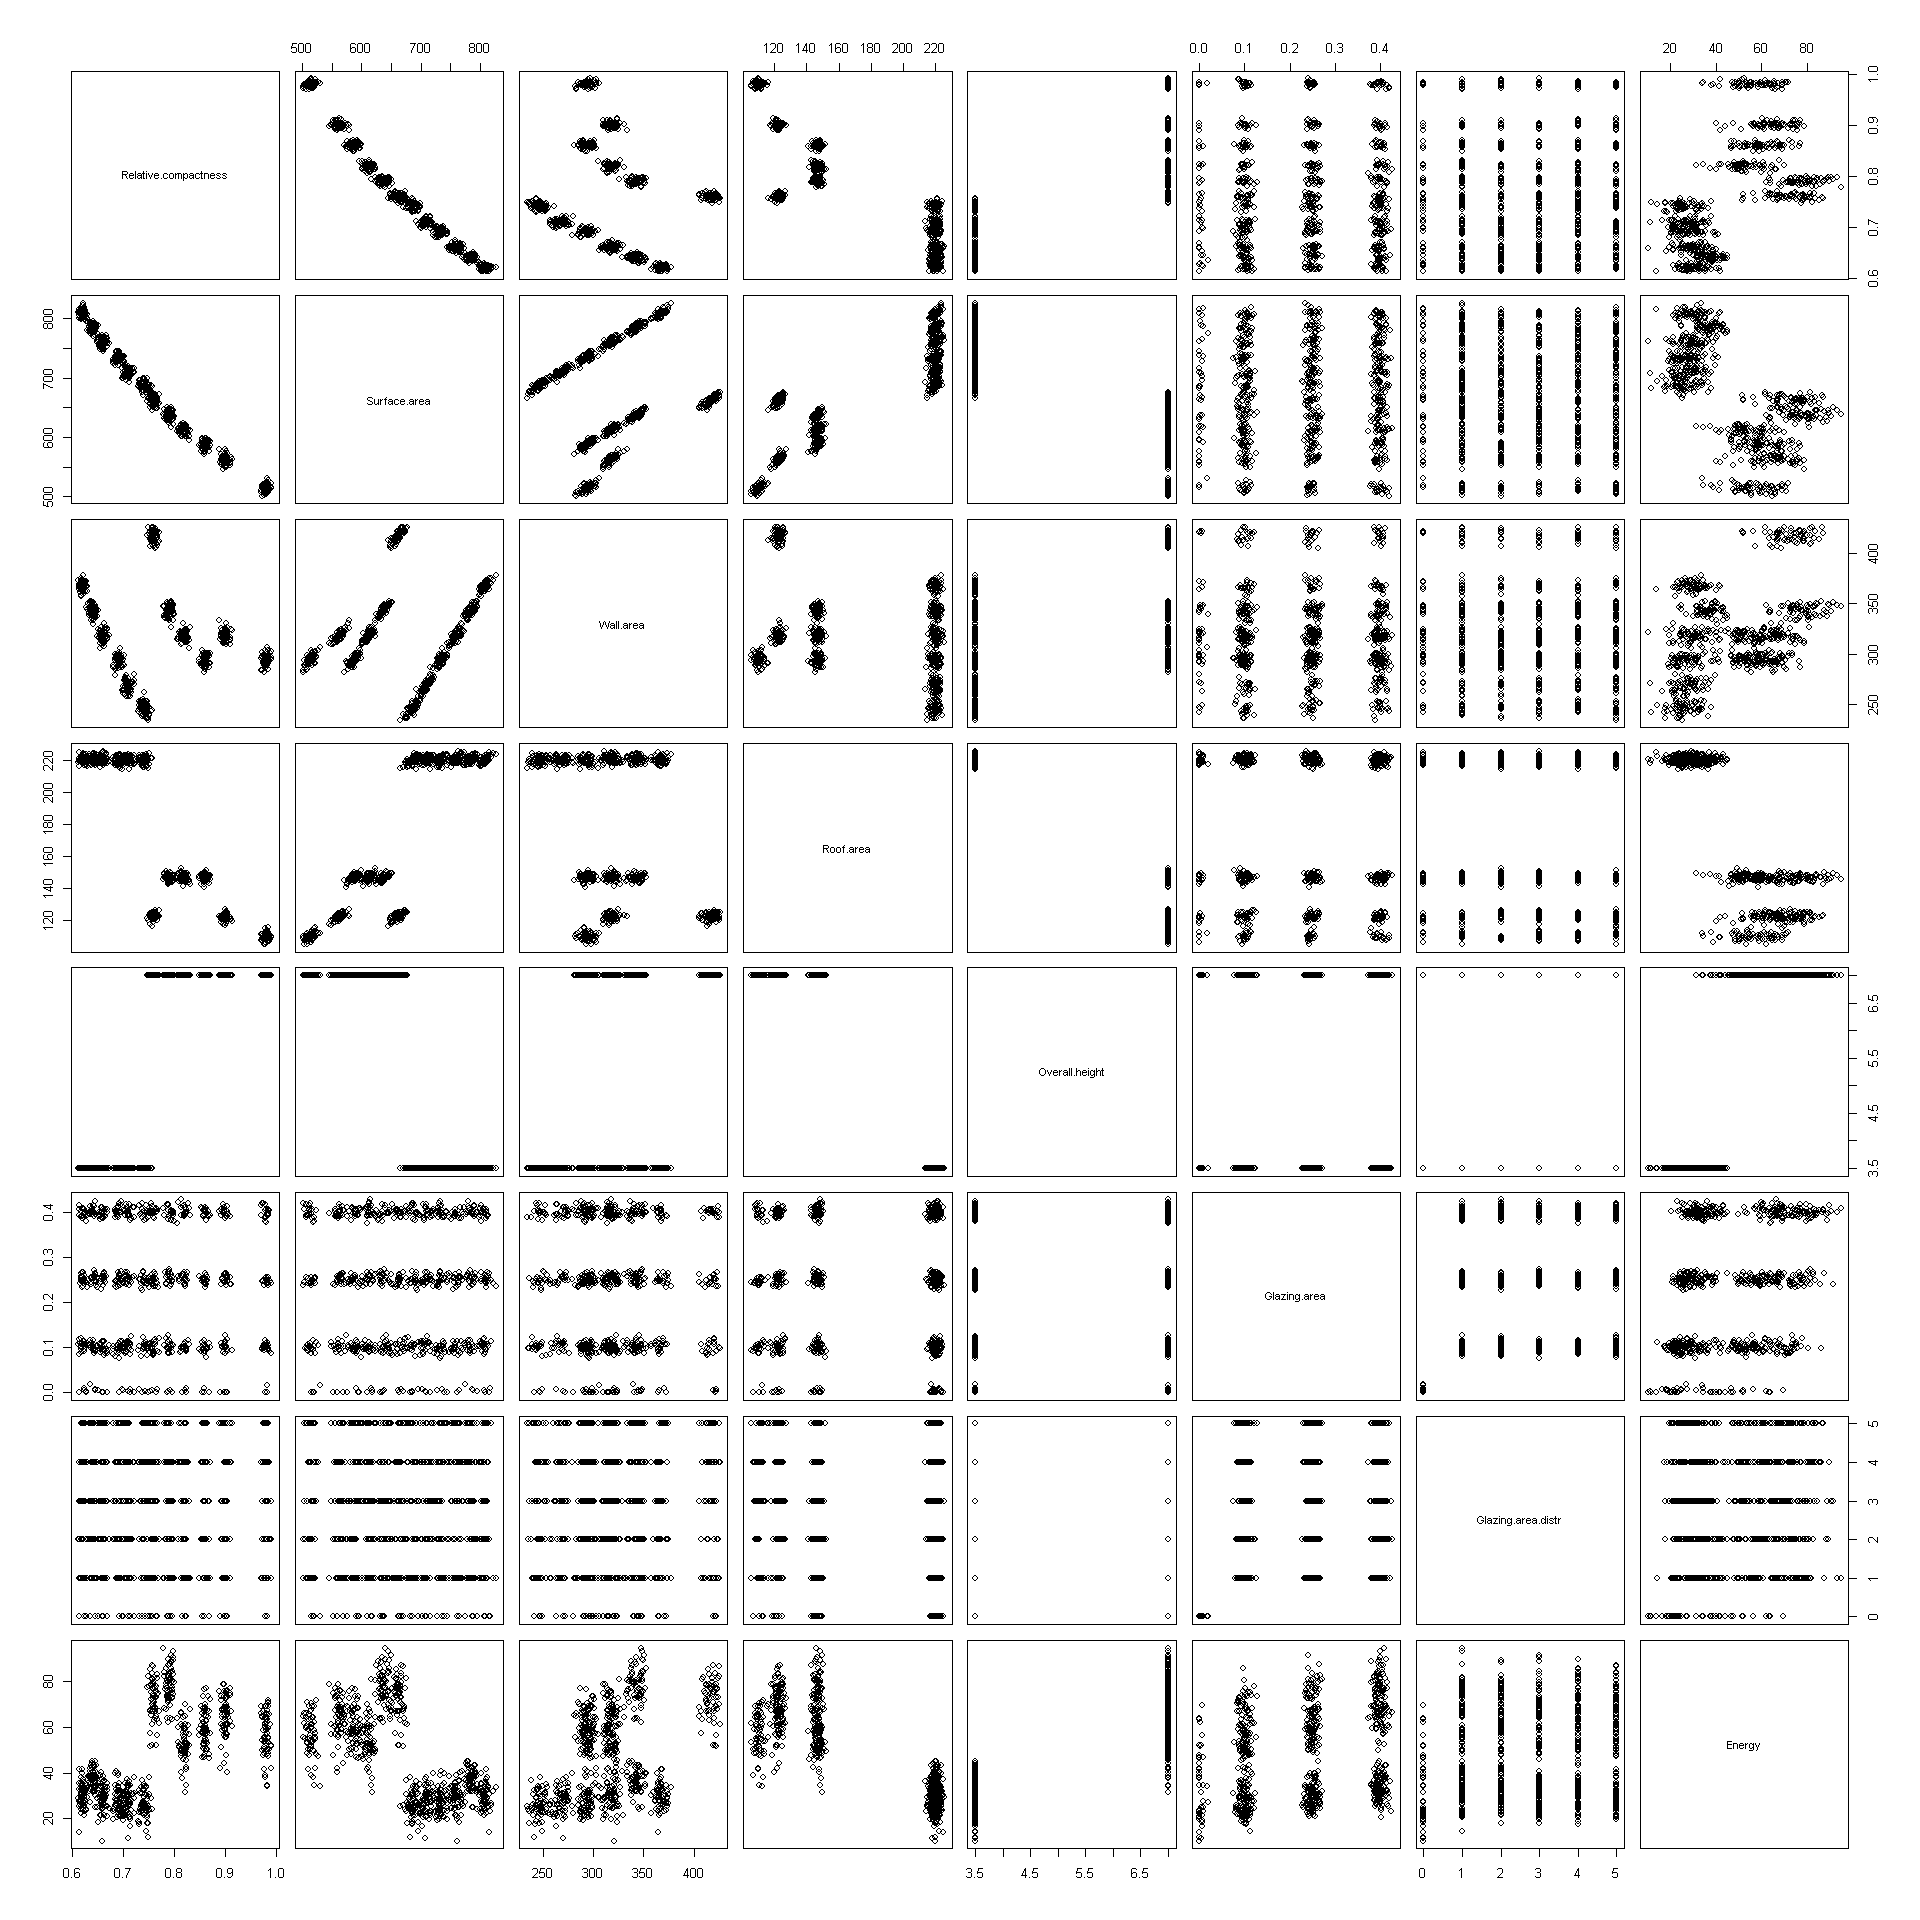

In [5]:
# pair plot
options(repr.plot.width = 16, repr.plot.height = 16)
pairs(energy[, c(1:5,7:9)])

#### Scatter plot entre la *Relative.compactness* et d'autres variables

In [6]:
#install.packages("ggplot2")
#install.packages("hrbrthemes")

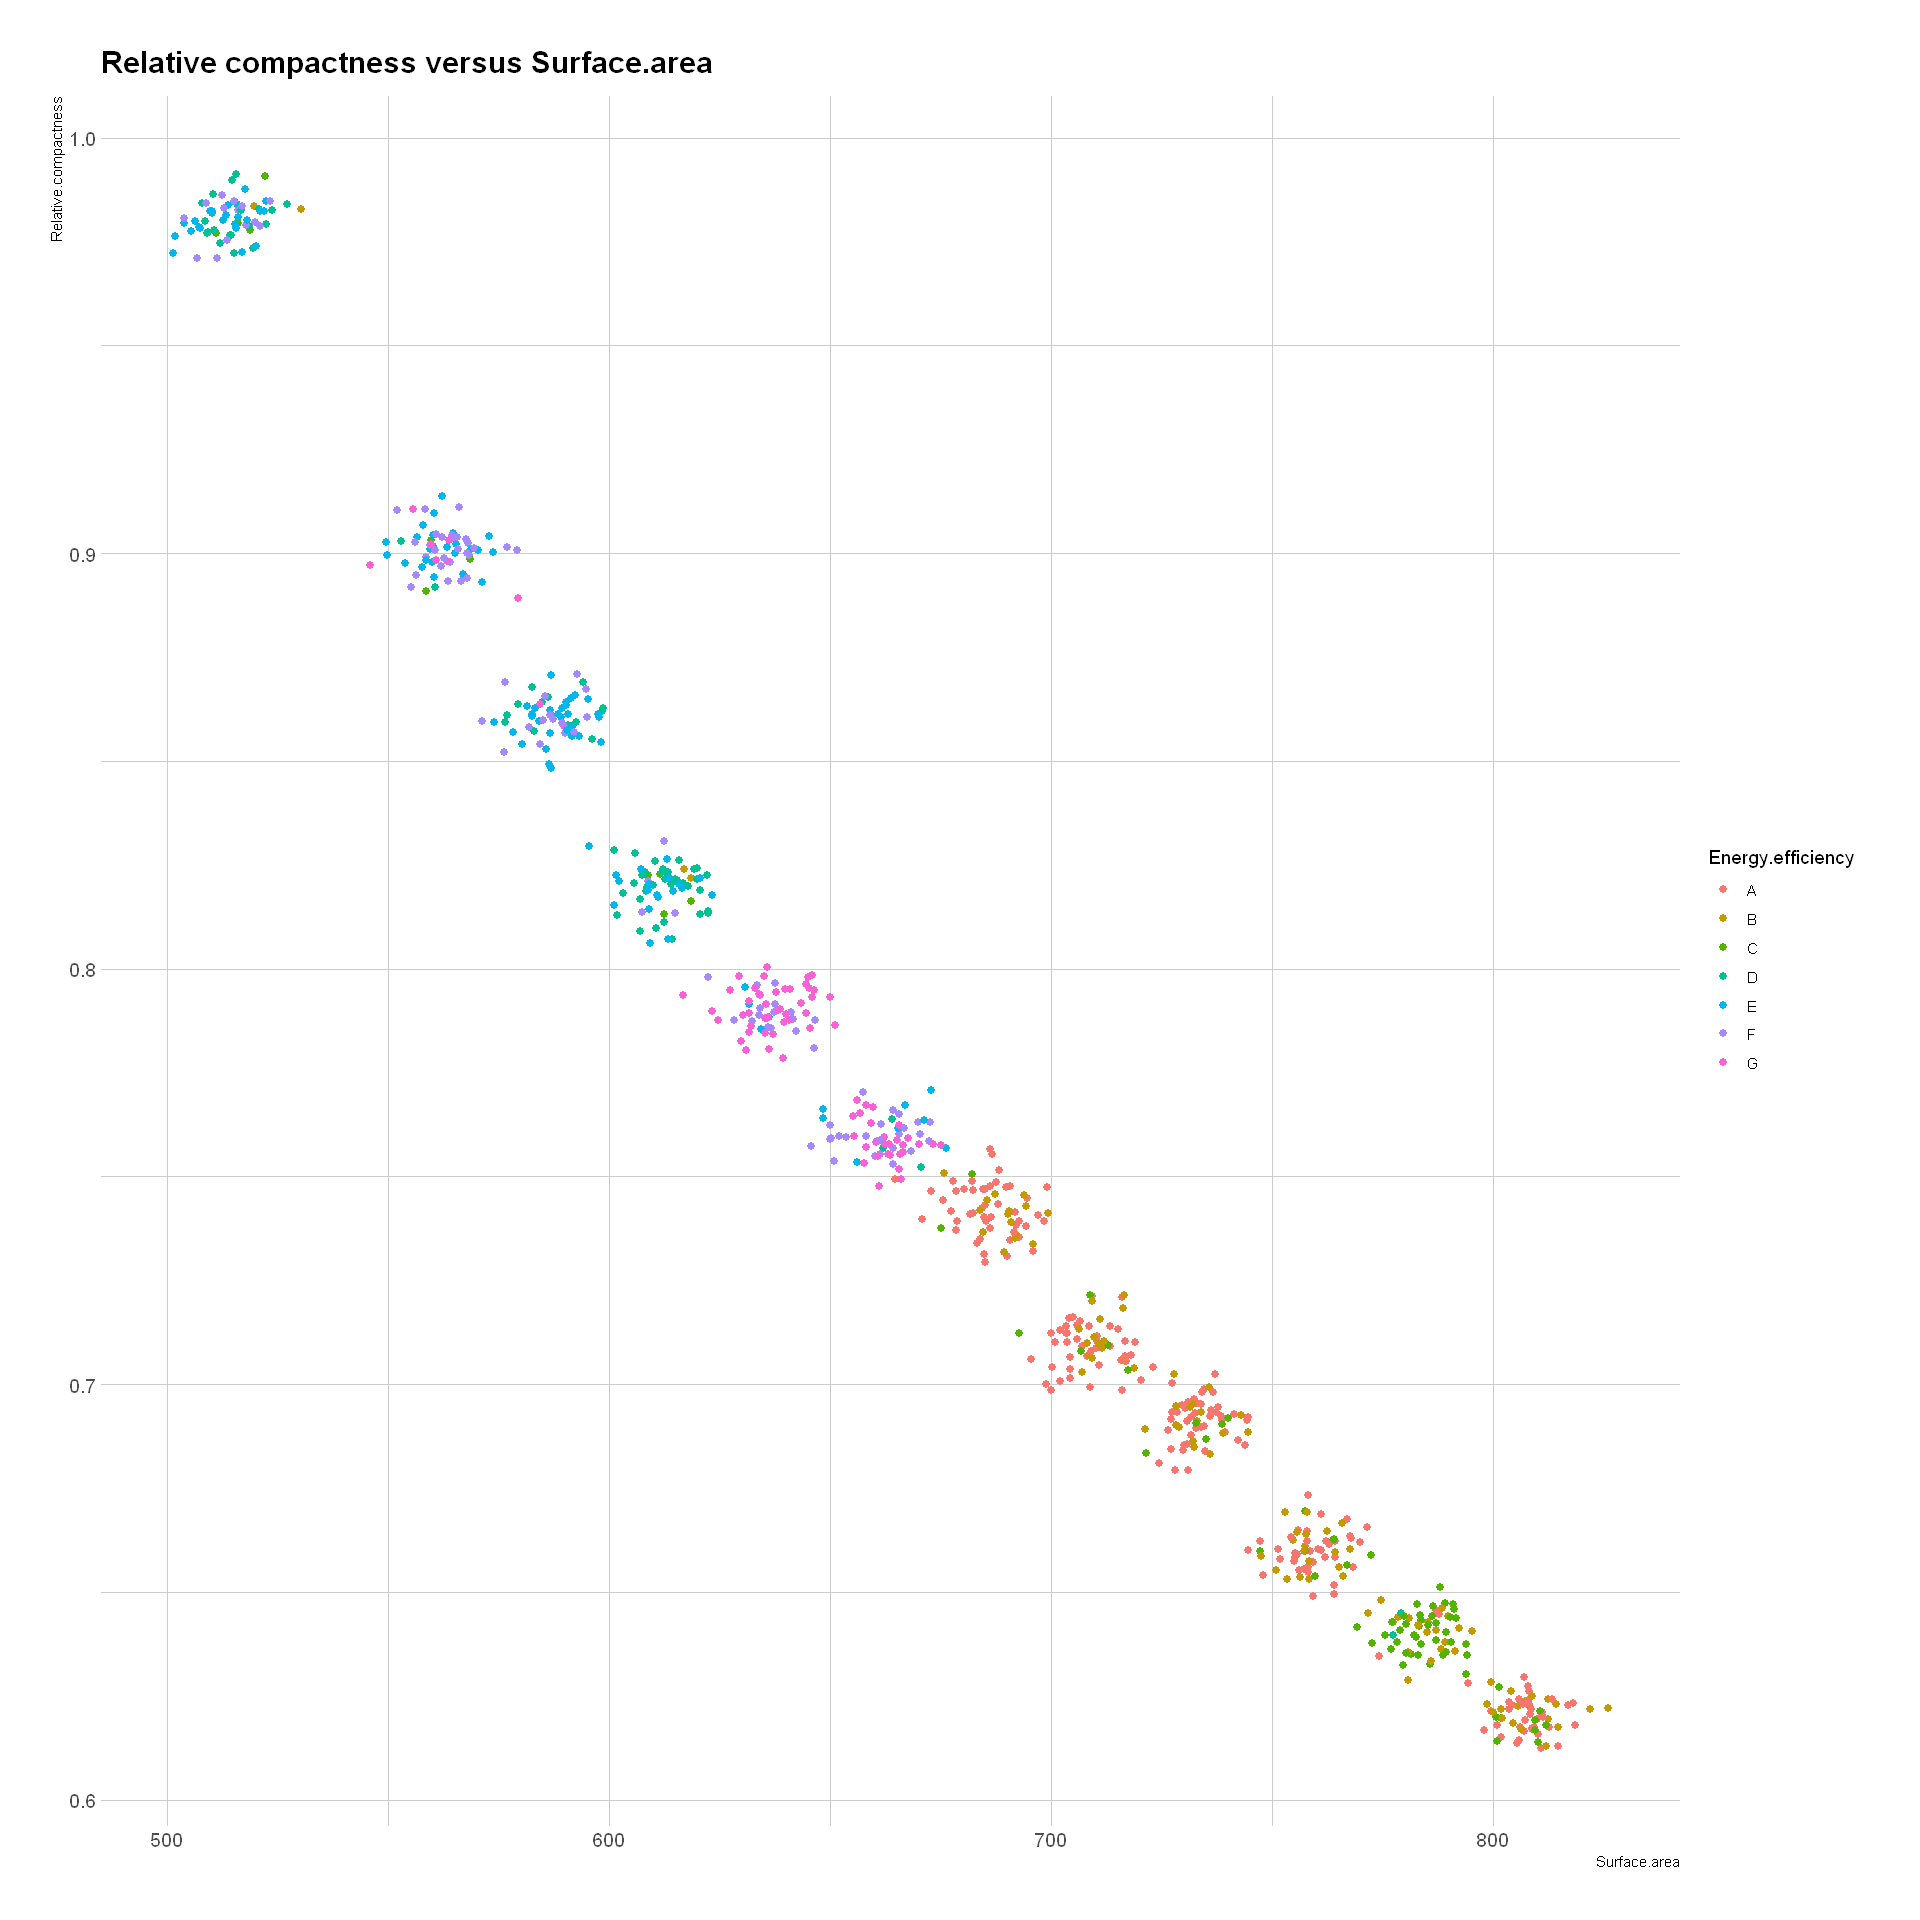

In [8]:
# statistiques descriptives par groupes
library(ggplot2)
library(hrbrthemes)

options(warn=-1)


df_energy <- data.frame(energy)

ggplot(df_energy, aes(Surface.area, Relative.compactness, colour=Energy.efficiency),
       mainTitle="papa")+geom_point(size=2)+ggtitle("Relative compactness versus Surface.area")+theme_ipsum()


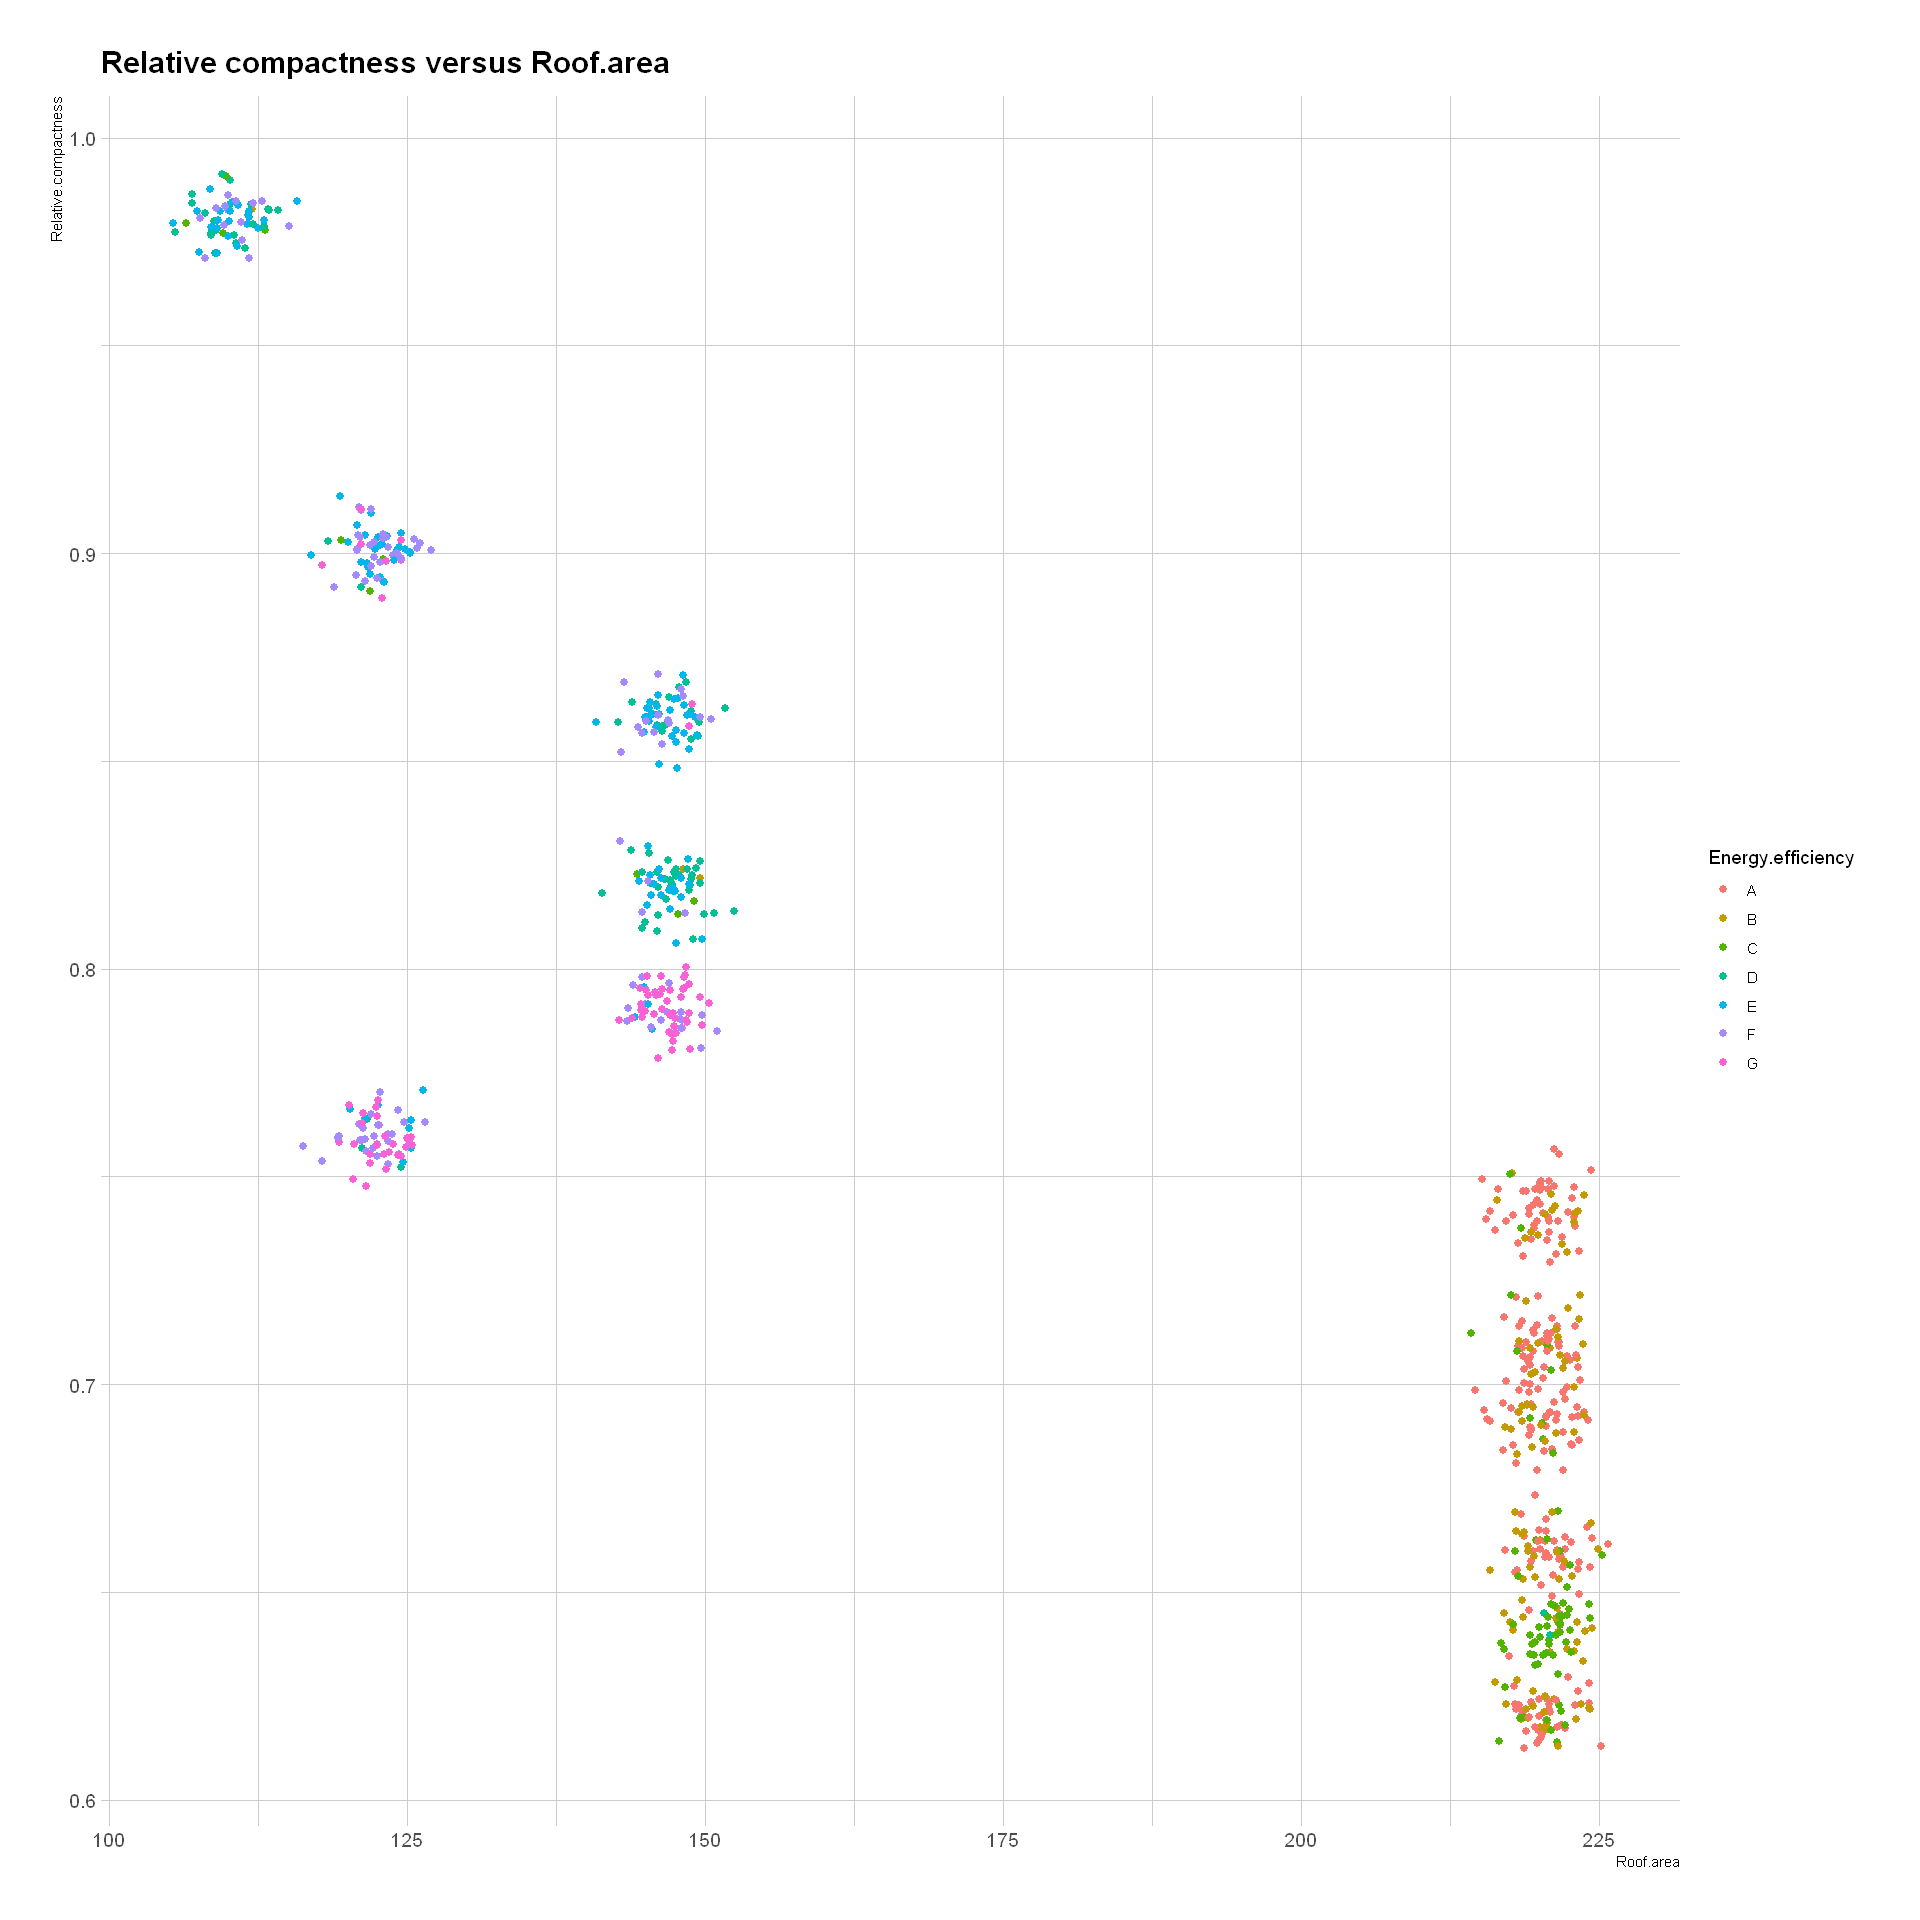

In [9]:
ggplot(df_energy, aes(Roof.area, Relative.compactness, colour=Energy.efficiency),
       mainTitle="papa")+geom_point(size=2)+ ggtitle("Relative compactness versus Roof.area")+theme_ipsum()

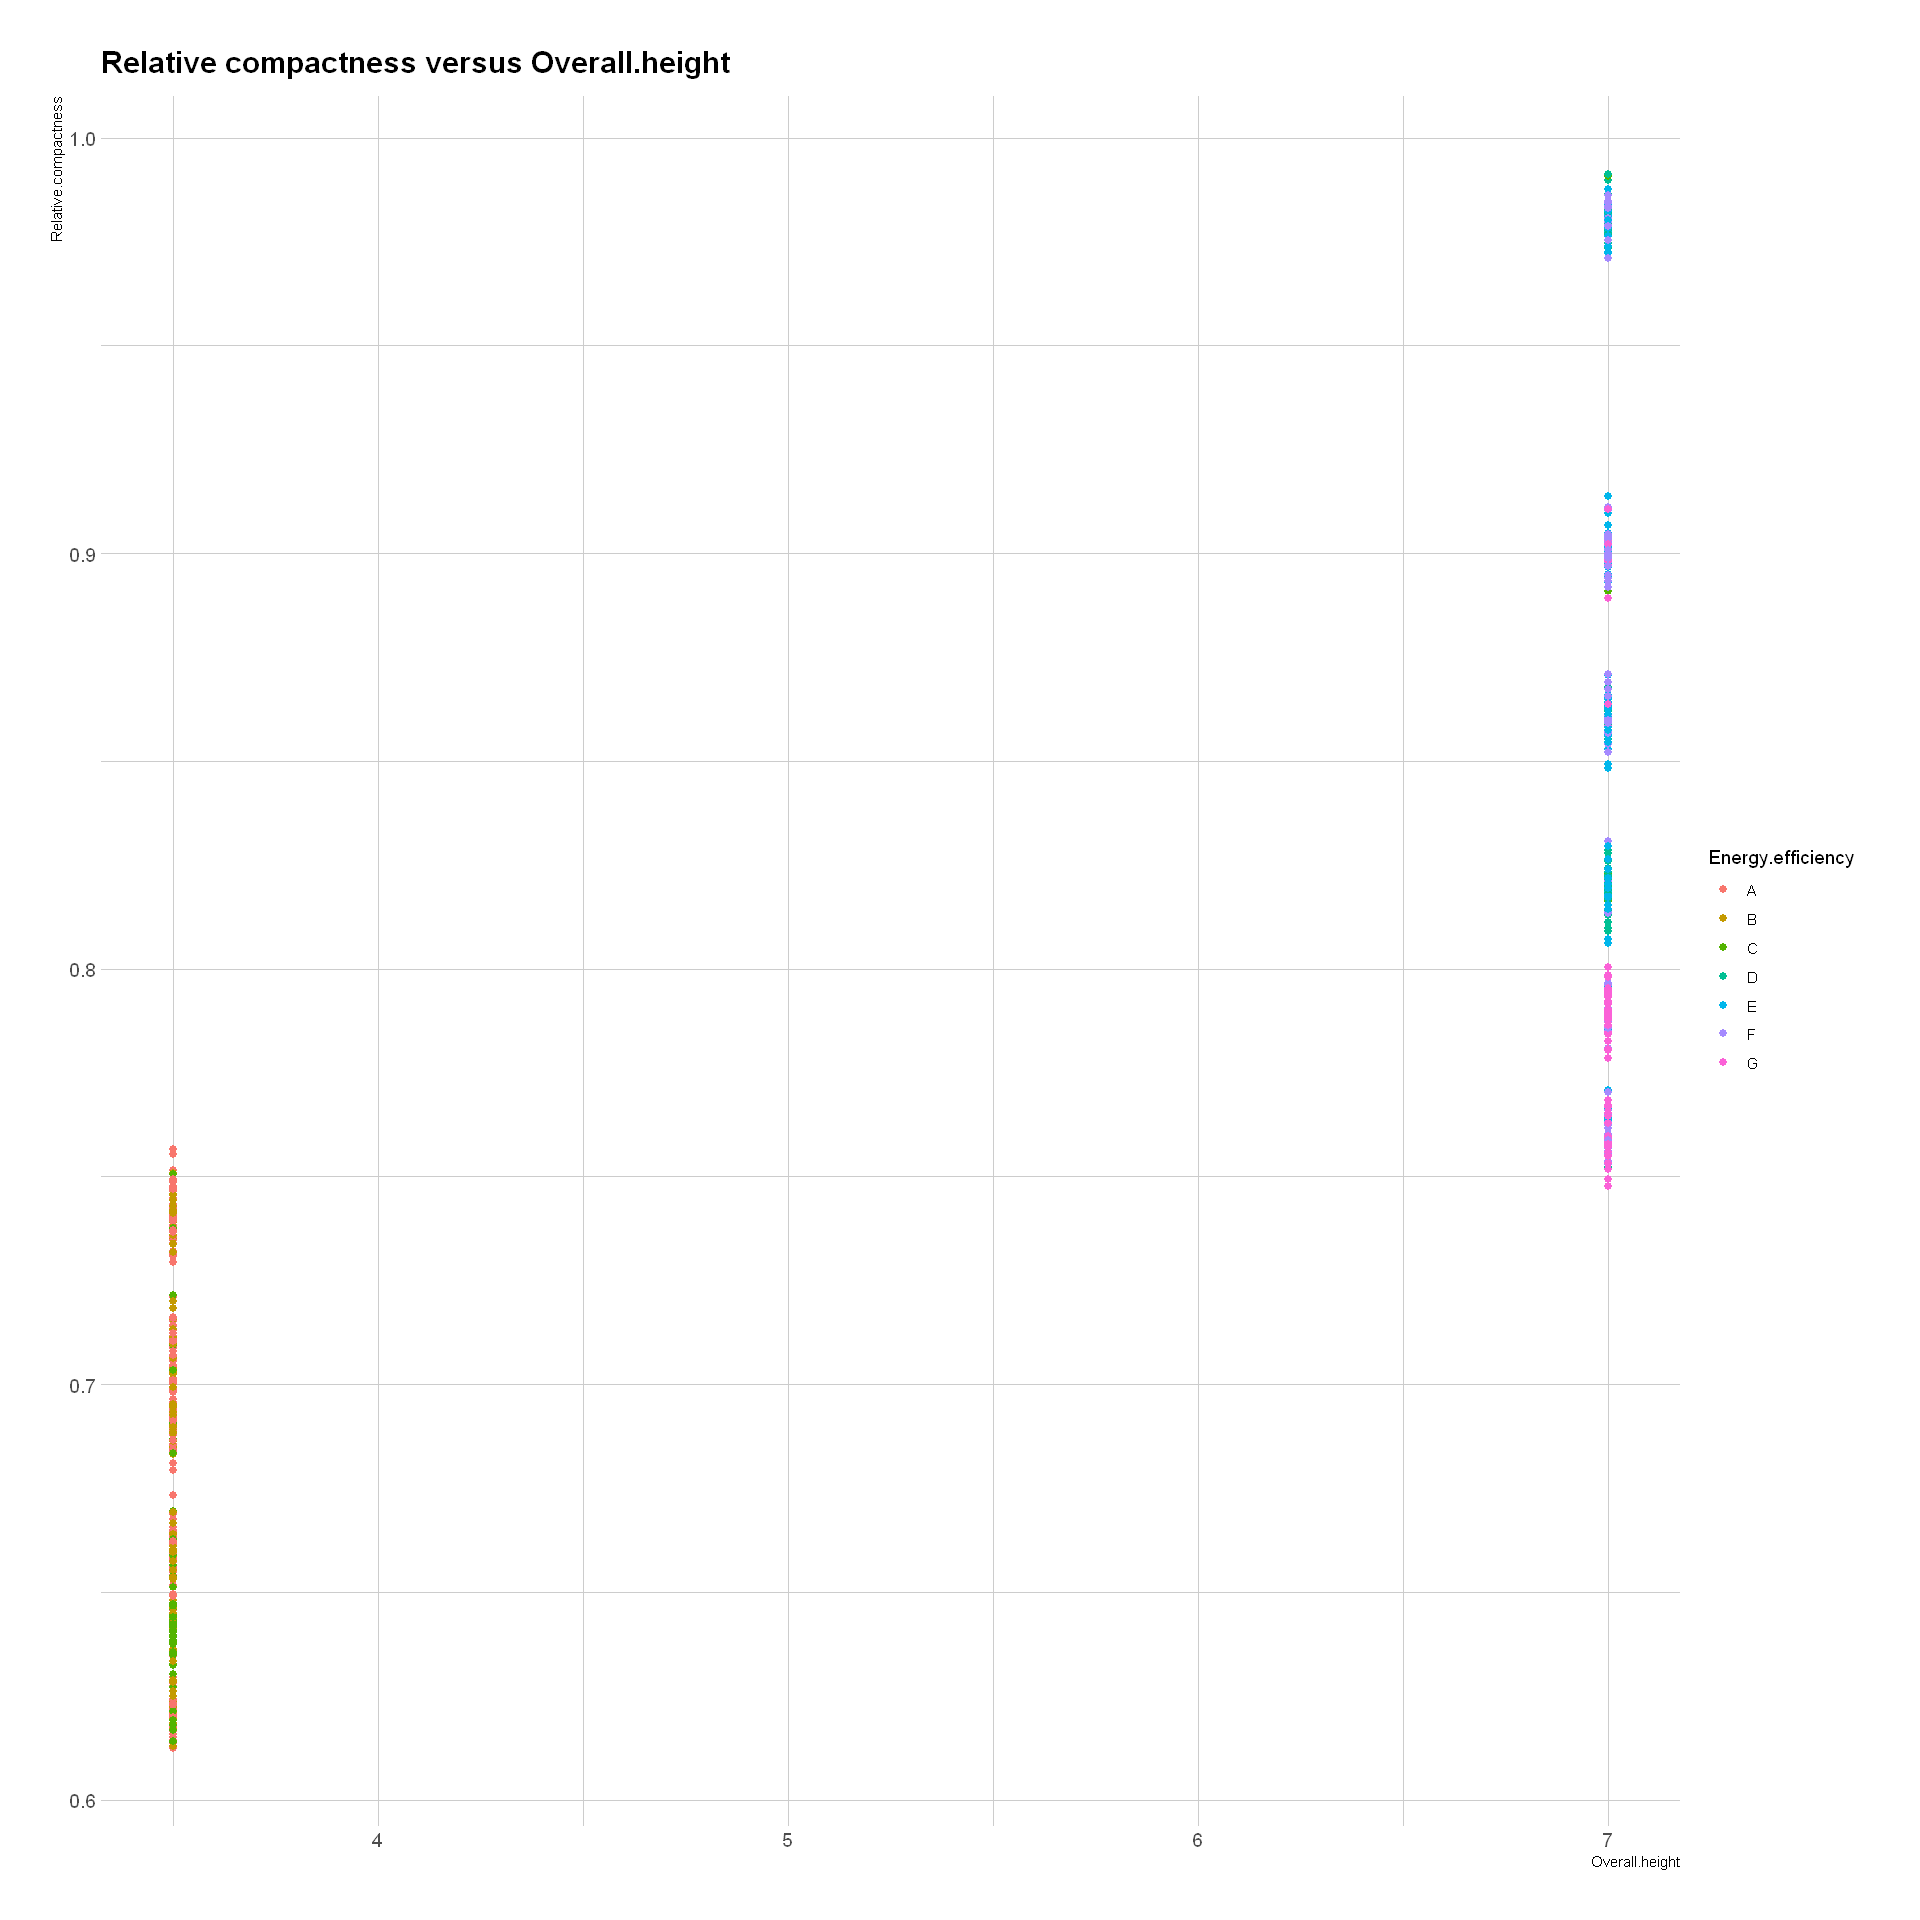

In [10]:
ggplot(df_energy, aes(Overall.height, Relative.compactness, colour=Energy.efficiency),
       mainTitle="papa")+geom_point(size=2)+ ggtitle("Relative compactness versus Overall.height")+theme_ipsum()


#### Scatter plot entre la *roof.area et d'autres variables*

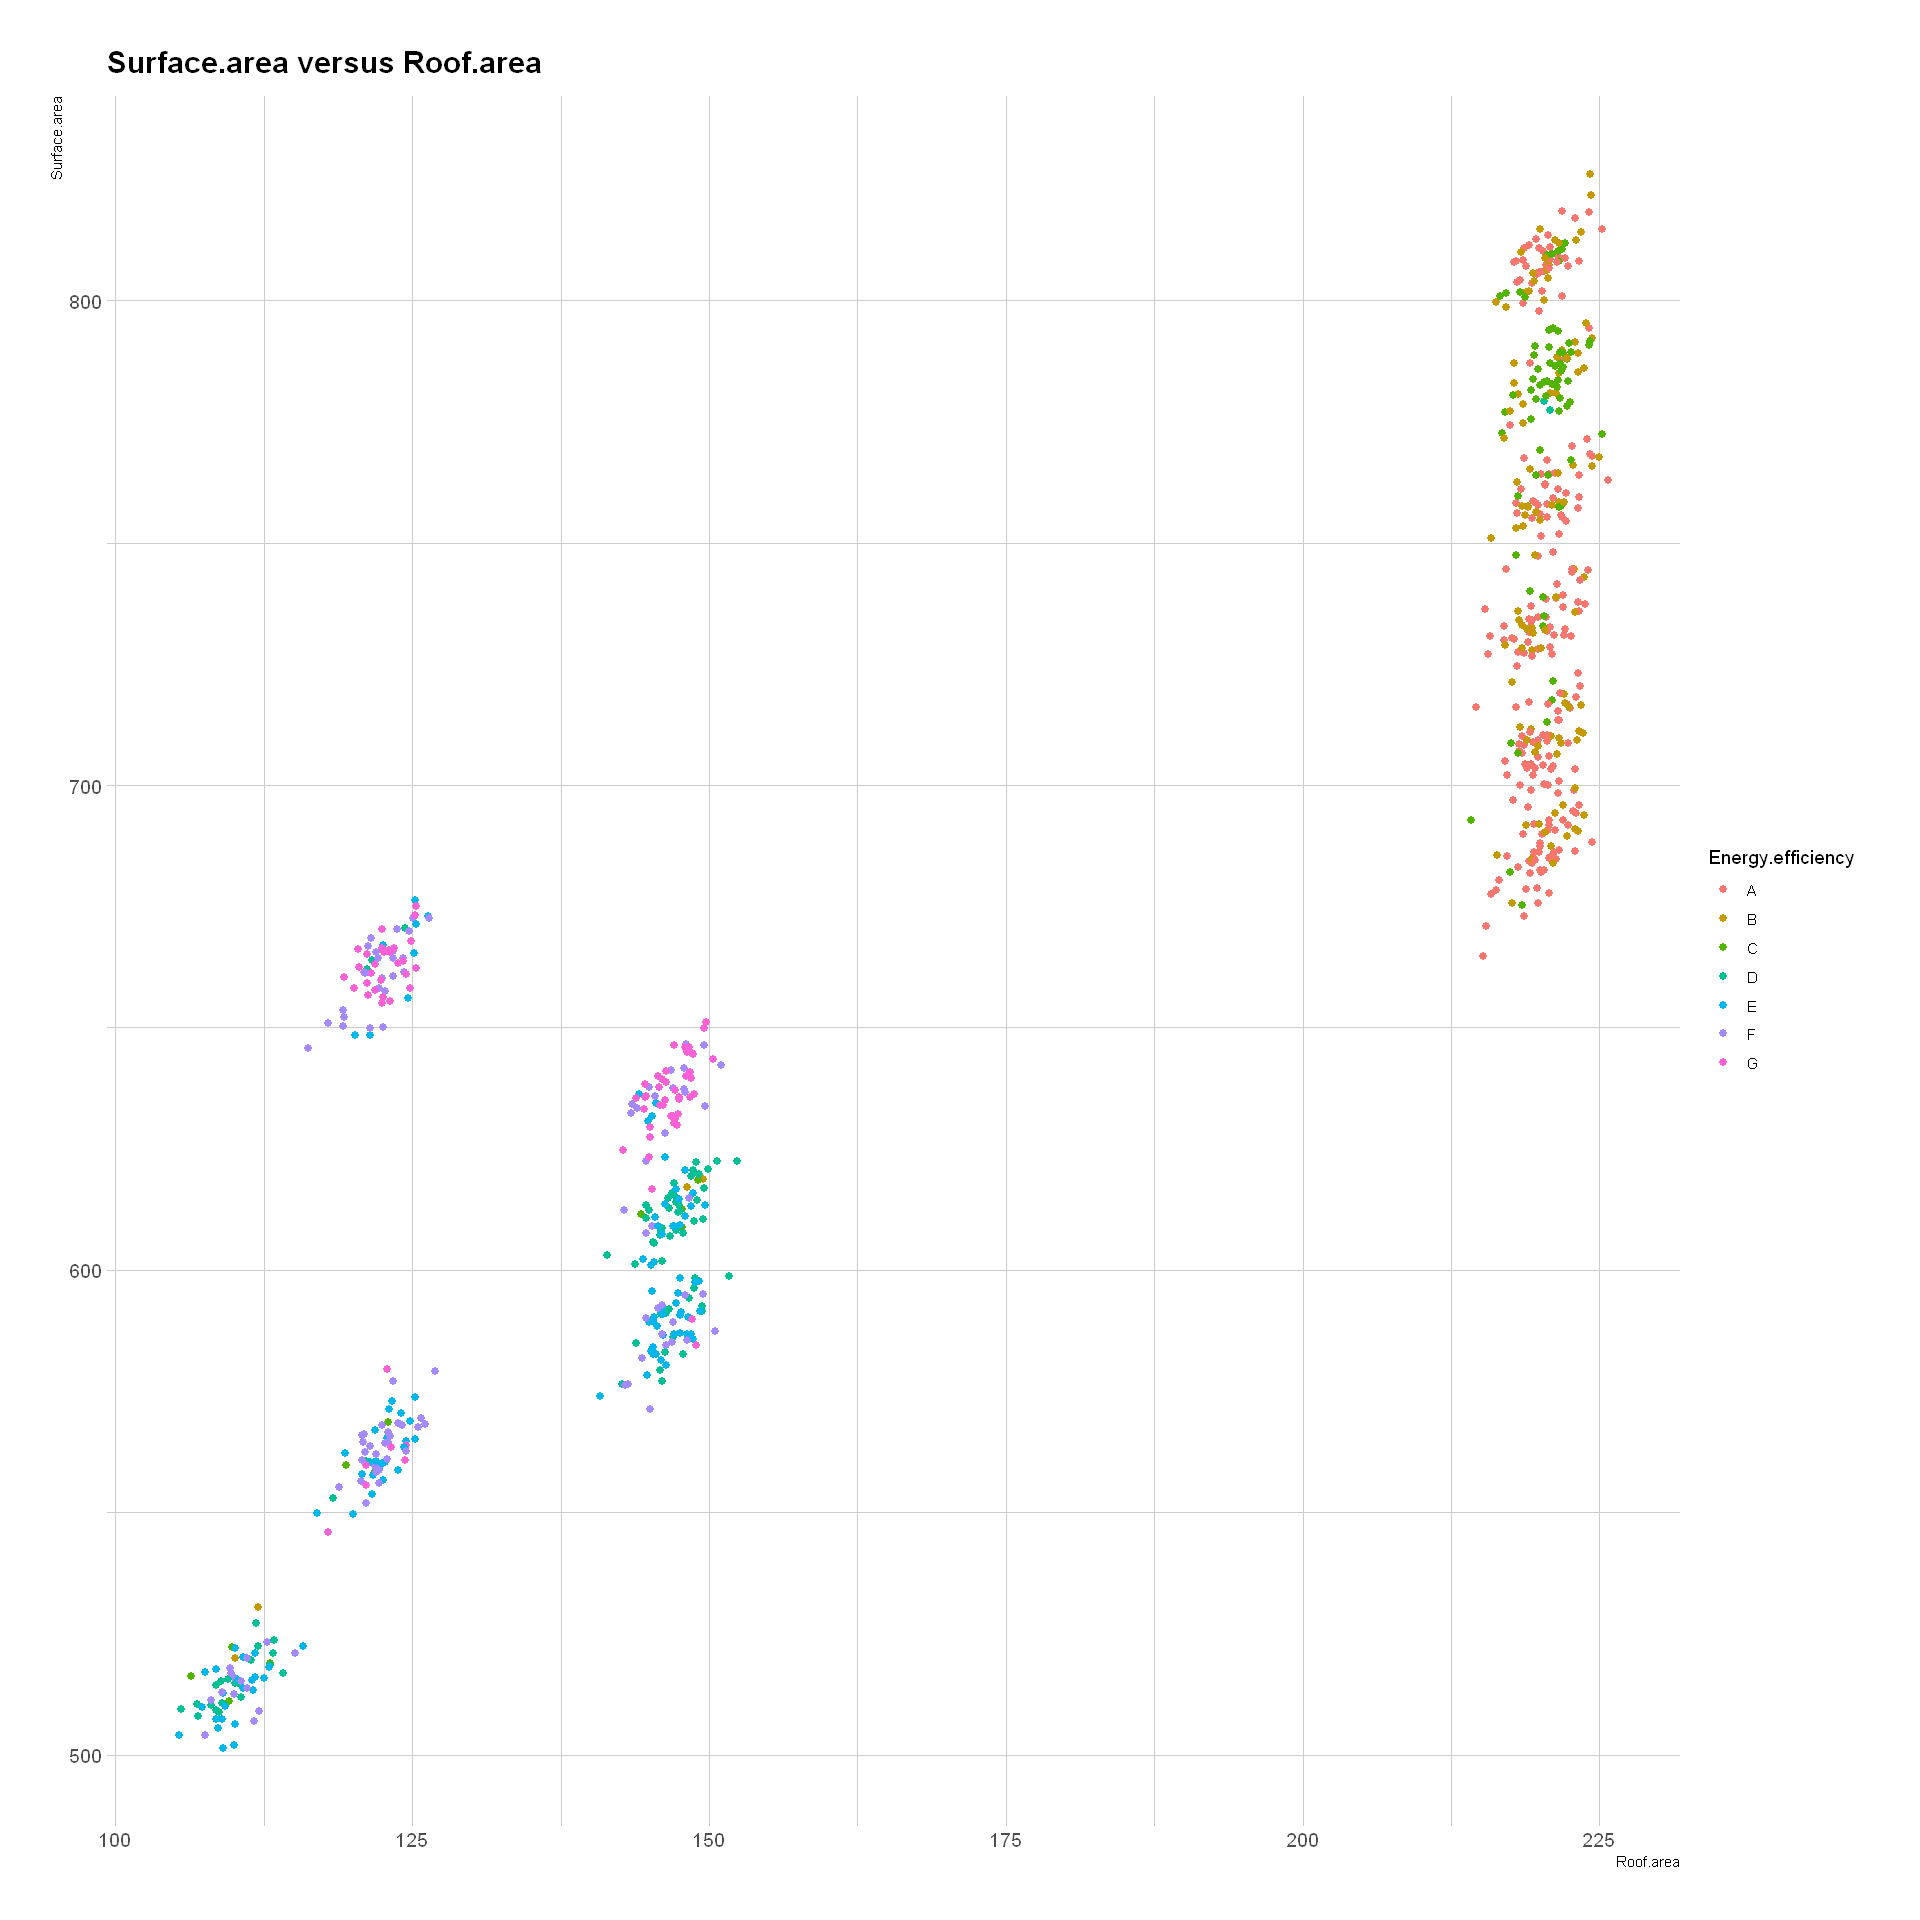

In [11]:
ggplot(df_energy, aes(Roof.area, Surface.area, colour=Energy.efficiency)
      )+geom_point(size=2)+ ggtitle("Surface.area versus Roof.area")+theme_ipsum()

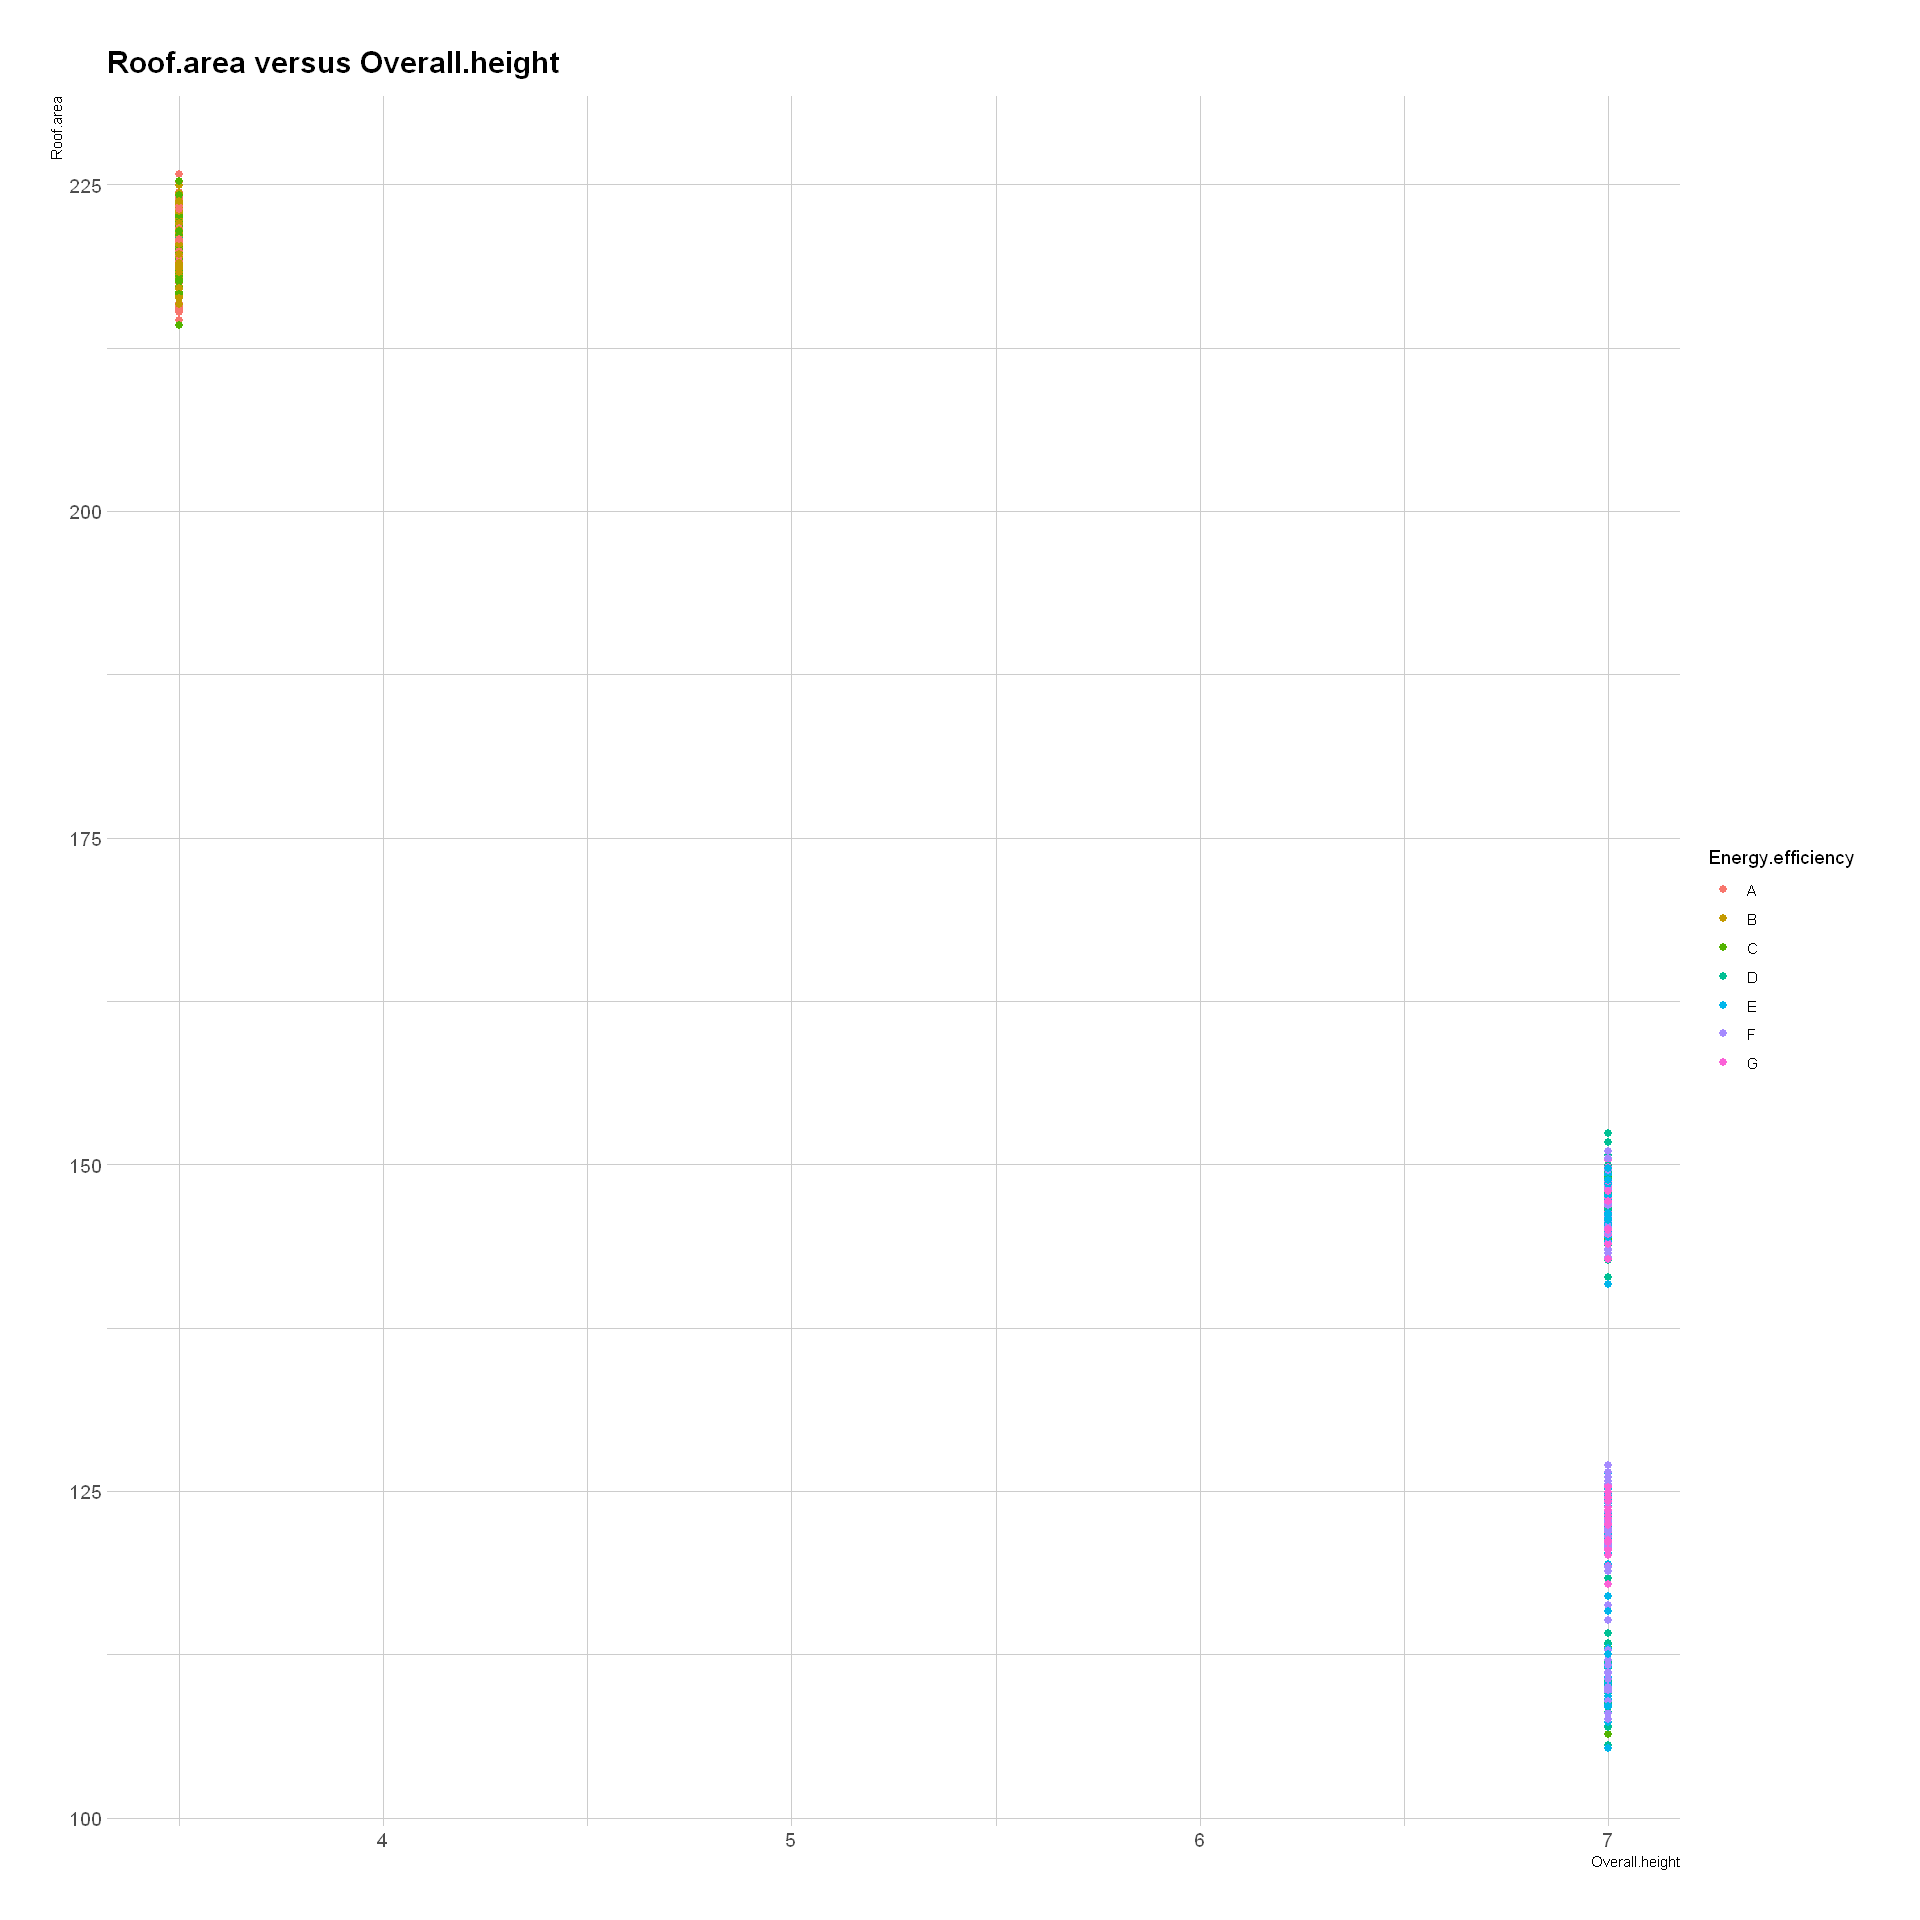

In [12]:
ggplot(df_energy, aes(Overall.height, Roof.area, colour=Energy.efficiency)
      )+geom_point(size=2)+ ggtitle("Roof.area versus Overall.height")+theme_ipsum()


#### Matrice de correlation

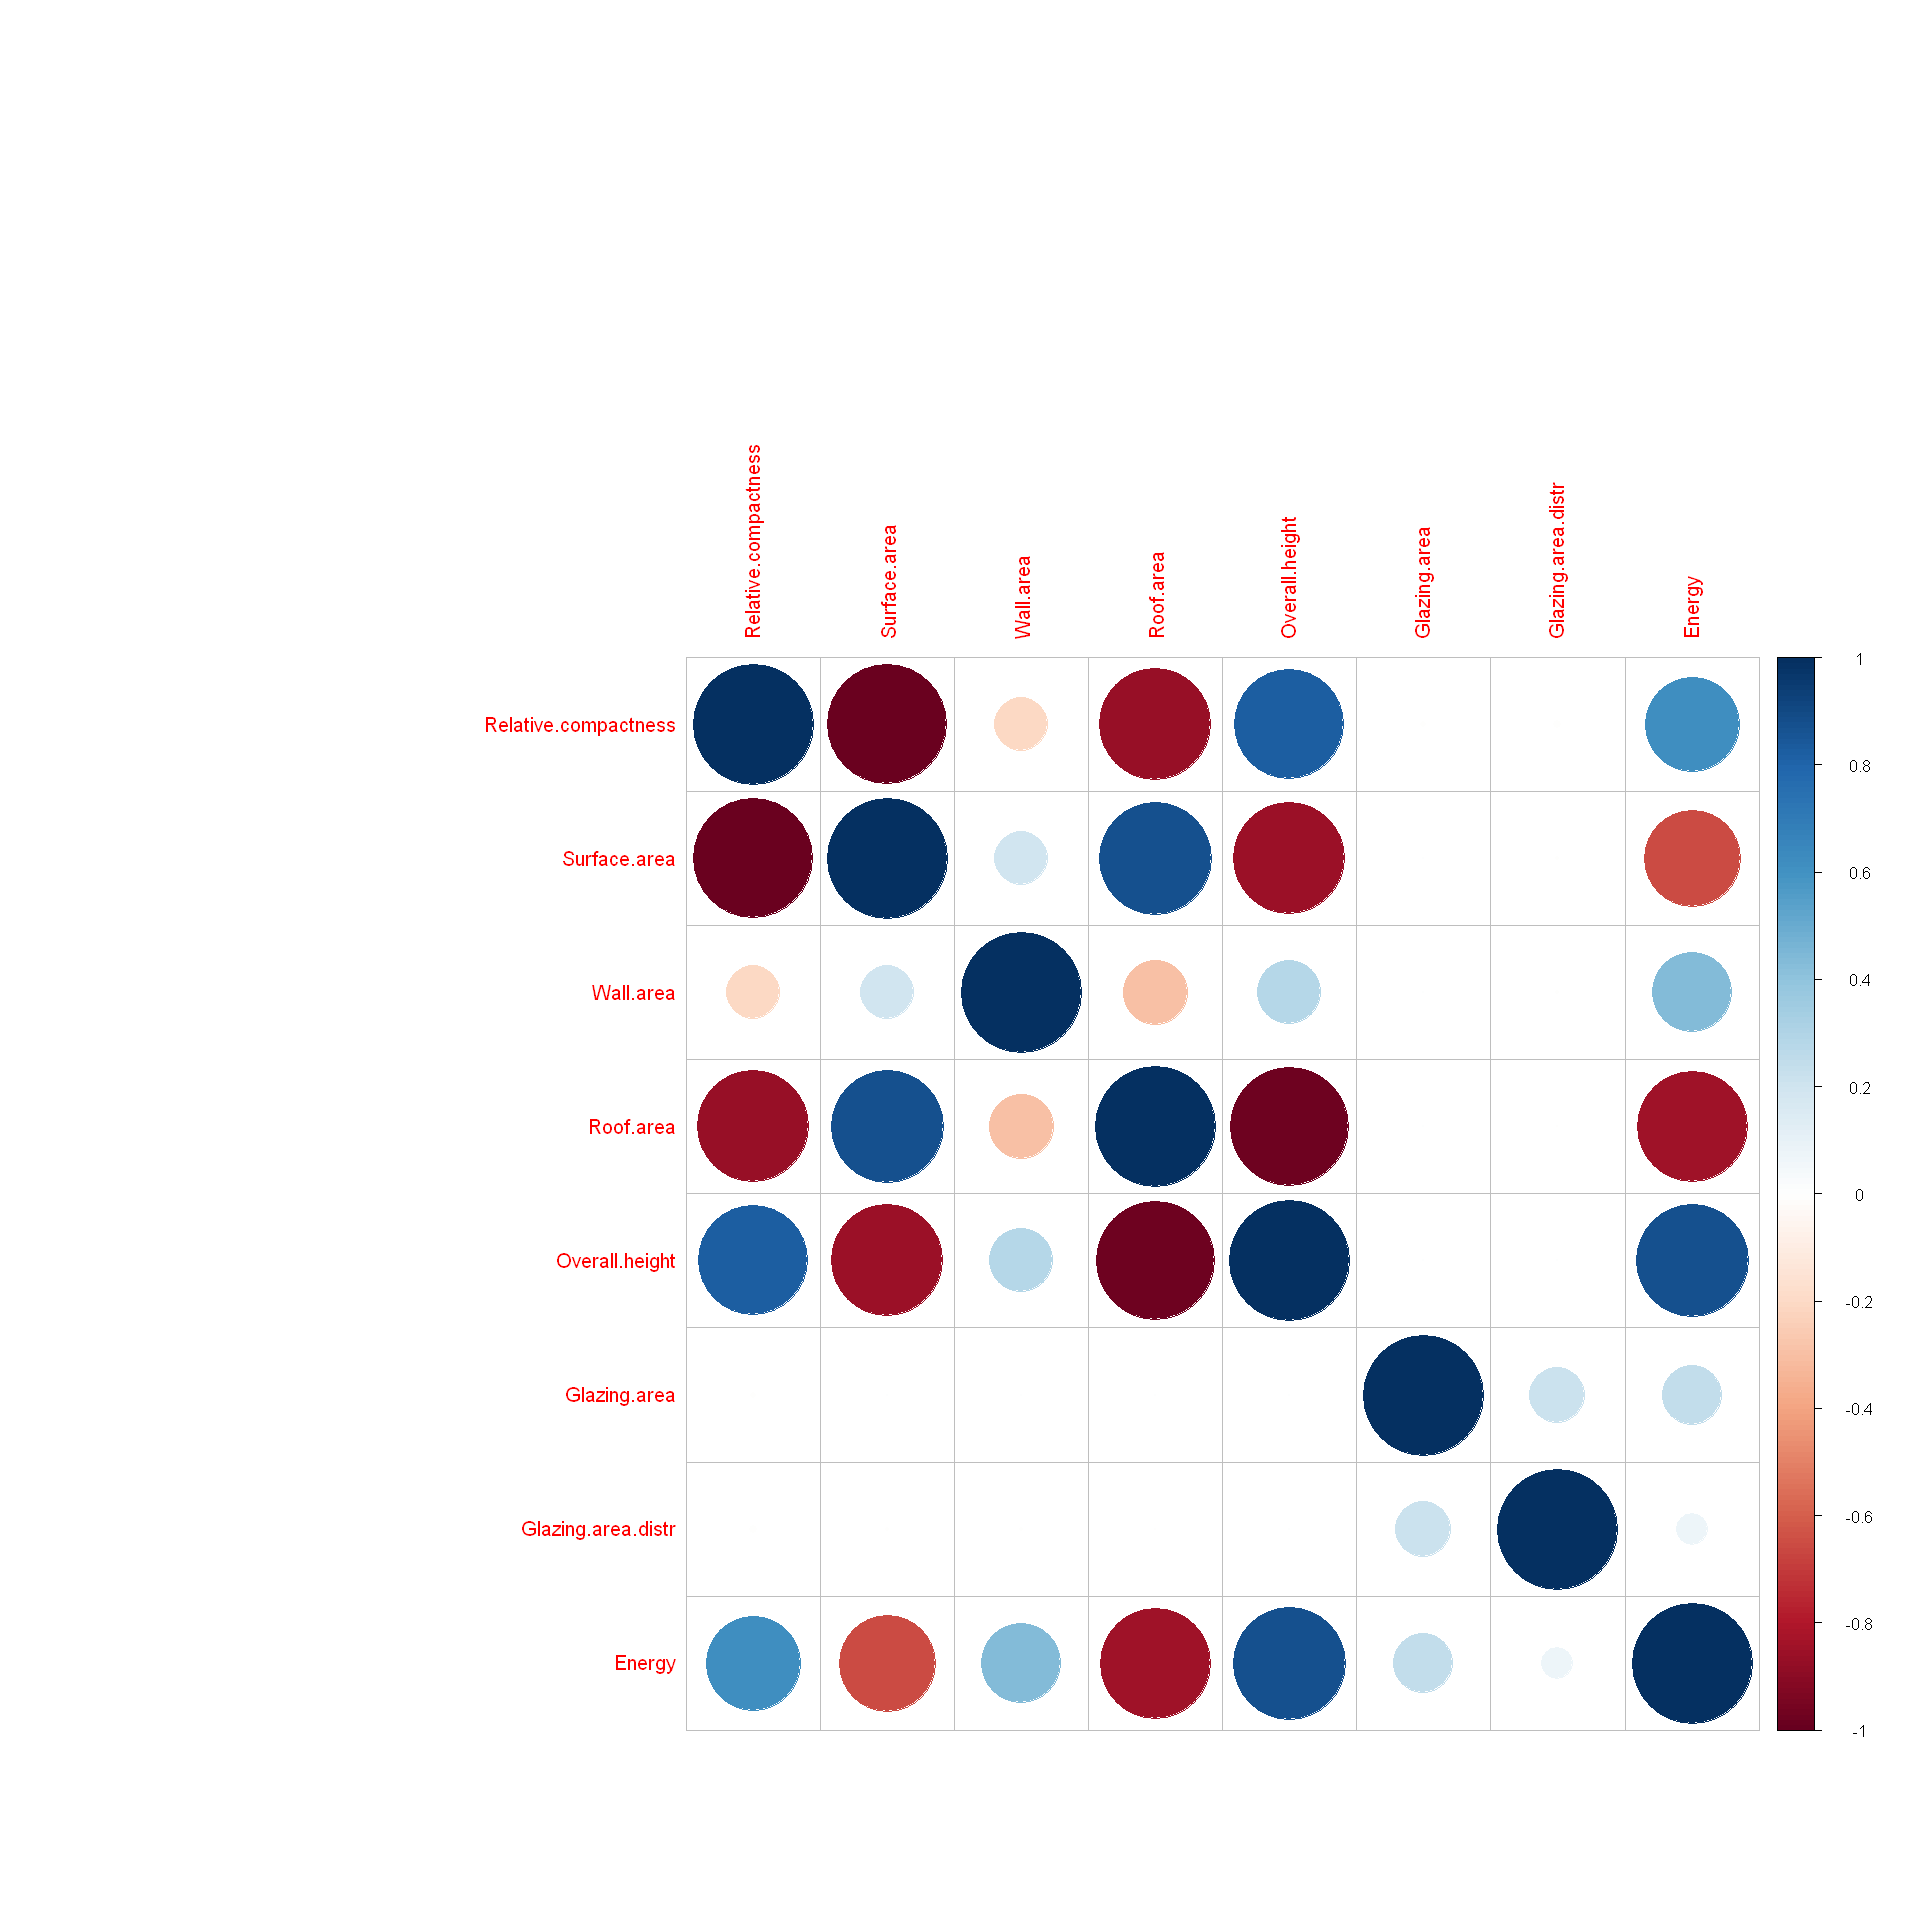

In [13]:
#pearson correlation
options(warn=0)
library(corrplot)
energy_corr <-cor(energy[, c(1:5,7:9)])
corrplot(energy_corr, method="circle")

**Commentaires** Ce coefficient de correlation n'est applicable que pour mesurer la relation entre deux variables X et Y ayant une distribution linéaire ou de type gaussien et ne comportant pas de valeur exceptionnelles. Si ces conditions ne sont pas vérifiées, l'emploi de ce coefficient peut aboutir à des conclusions erronées sur la présence ou l'absence d'une relation. Il faudrait donc s'assurer de la distrubution de type gaussienne de nos variables. De plus l'absence d'une relation linéaire ne signifie pas l'absence de toute relation entre deux variables.

**Commentaires:**

* **influence des variables explicatives sur la variable à expliquer:**
     *Relative.Compactness, Surface.area, Roof.area et Overhall.height* semblent être les plus influents sur l'éfficacité énergetique au regards de cette matrice corrélation.

* **interaction entre les variables** 
 * Il y a une forte liaison entre :
     * la *Relative.Compactness et Overhall.height*. Ce qui semble logique car la compacité relative d'un bâtiment est le rapport entre la surface de déperdition (l'enveloppe extérieure) et le volume protégé, qui dépend de la hauteur du bâtiment. La variable *Overhall.height* pourrait ne pas être prise en compte dans nos modélisation. Nous allons évaluer la pertinence de cette remarque.
     * *Surface.area et Roof.area*. Ce qui paraît logique car le *Roof.area* est contenu dans la surface totale *Surface.area*, qui sera retiré dans nos modèles. 
 * Il y a également une forte correlation négative entre:
     * *Relative.Compactness* et les variables *Surface.area et Roof.area*. Quand la première variable croit, les autres vont décroitre.
     * *Overhall.height* et les variables *Surface.area et Roof.area*
      


## 3. Principal Component Analysis


**Variables quantitatives**

In [14]:
head(energy[,c(1:4,7,9)])

,Relative.compactness,Surface.area,Wall.area,Roof.area,Glazing.area,Energy
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.9829276,530.4900,306.4846,112.0027,1.609490e-02,34.26394
2,0.9835473,519.8724,299.7763,110.0480,0.000000e+00,34.58975
3,0.9794535,516.1912,303.3744,106.4084,0.000000e+00,38.77805
4,0.9777325,518.9241,292.8122,113.0559,9.554434e-06,37.94781
5,0.9030294,552.9689,316.2361,118.3664,0.000000e+00,47.67586
6,0.8909102,558.6037,314.9162,121.8437,0.000000e+00,41.90847


**On extrait toutes les variables quantitatives à l"exception de la vairbale Energy**

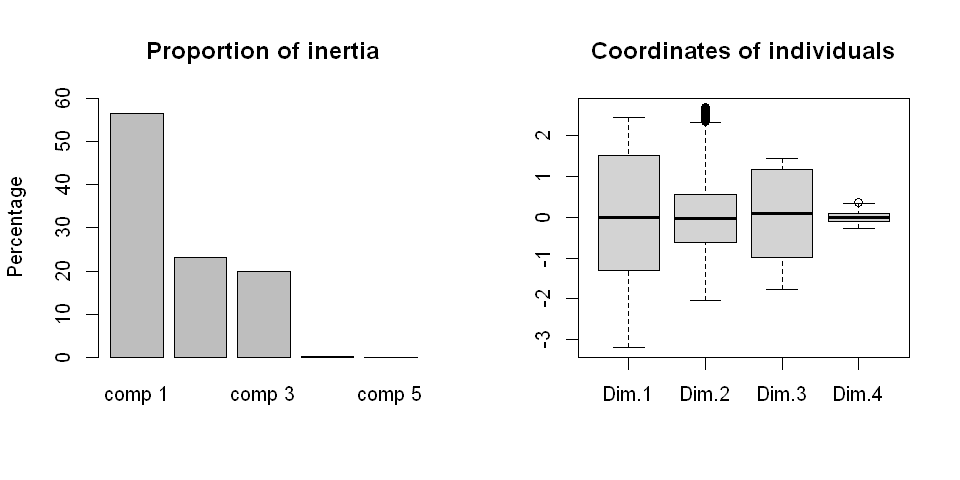

In [15]:
# ACP réduite
# Décroissance des valeurs propres
library(FactoMineR)

acp <- PCA(energy[, c(10, 1:4,7)], scale.unit = TRUE,
           graph = FALSE, quali.sup = 1, ncp = 4)
options(repr.plot.width = 8, repr.plot.height = 4)
par(mfrow = c(1, 2))
barplot(acp$eig[, 2],ylim=c(0,60), ylab = "Percentage", main = "Proportion of inertia")
boxplot(acp$ind$coord, main = "Coordinates of individuals")

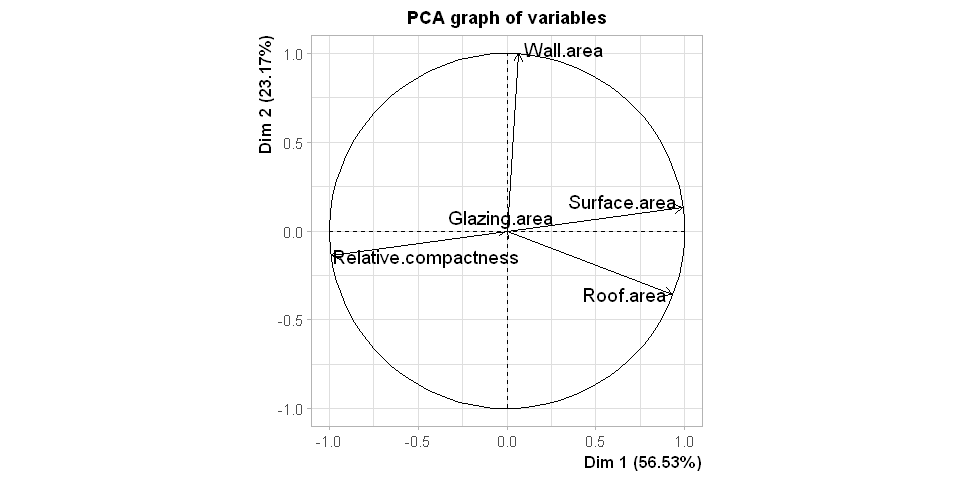

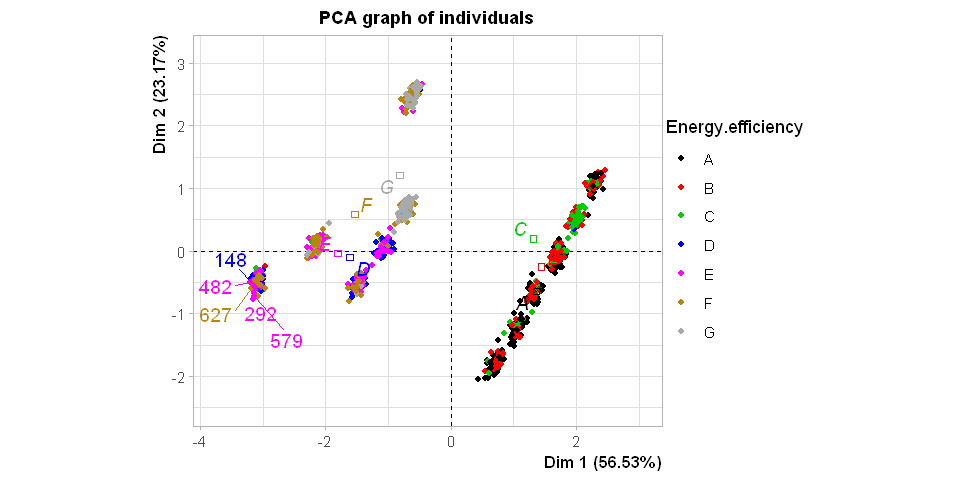

In [16]:
plot(acp, choix = "varcor")
plot(acp, choix = "ind", habillage = 1, select = "contrib 5", unselect = 0)

In [19]:
#install.packages("factoextra")
library("factoextra")

eig.val <- get_eigenvalue(acp)
round(eig.val,3)

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,2.826,56.528,56.528
Dim.2,1.158,23.170,79.698
Dim.3,1.000,20.000,99.698
Dim.4,0.015,0.302,100.000
Dim.5,0.000,0.000,100.000


In [20]:
var <- get_pca_var(acp)
head(round(var$cos2,3), 5)

,Dim.1,Dim.2,Dim.3,Dim.4
Relative.compactness,0.971,0.019,0,0.010
Surface.area,0.980,0.017,0,0.003
Wall.area,0.004,0.995,0,0.000
Roof.area,0.871,0.127,0,0.002
Glazing.area,0.000,0.000,1,0.000


**Commentaire:** On obtient des resultats similaires à ceux obtenus sur Python. En revanche, l'affichage  figures illustratives est beaucoup plus simple. Ainsi, pour l'analyse exploratoire des données ainsi que l'ACP, il est preferable de choisir R pour les études.

## 4.Techniques de clustering

### 4.1. Techniques de clustering

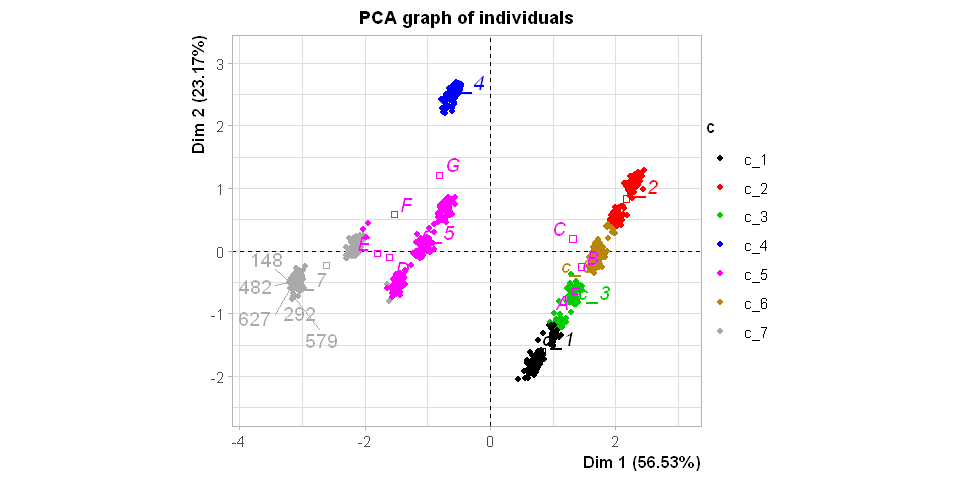

In [21]:
km.energy <- kmeans(energy[, c(1:4,7)], centers = 7)

# Représentation dans les coordonnées de l'acp
acp2 <- PCA(cbind(c = as.factor(km.energy$cluster),
          energy[, c(10, 1:4,7)]), scale.unit = TRUE,
          graph = FALSE, quali.sup = 1:2, ncp = 3)
plot(acp2, choix = "ind",  habillage = "c", select = "contrib 5", unselect = 0)

**Commentaire**: On arrive à mieux voir les formations de clusters et à etablir les correspondances visuellement. Les valeurs abberrantes sobt observables beucoup plus facilement.

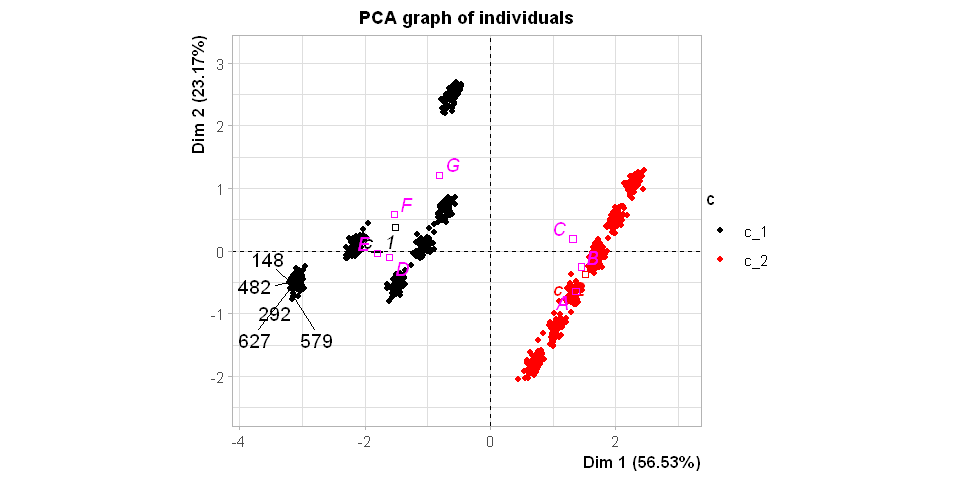

In [22]:
km.energy <- kmeans(energy[, c(1:4,7)], centers = 2)

# Représentation dans les coordonnées de l'acp
acp2 <- PCA(cbind(c = as.factor(km.energy$cluster),
          energy[, c(10, 1:4,7)]), scale.unit = TRUE,
          graph = FALSE, quali.sup = 1:2, ncp = 3)
plot(acp2, choix = "ind",  habillage = "c", select = "contrib 5", unselect = 0)

**On arrive à former idéealement deux clusters (A,B,C) et (E,F,G).**

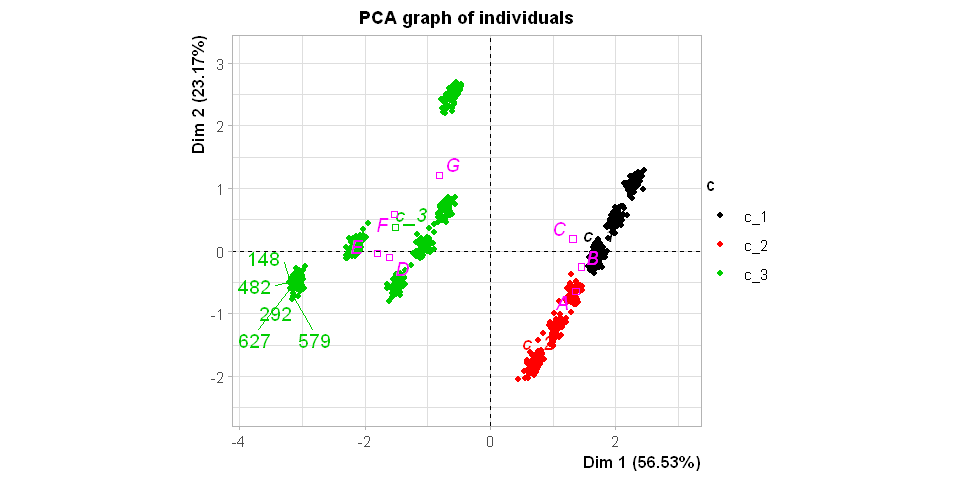

In [23]:
km.energy <- kmeans(energy[, c(1:4,7)], centers = 3)

# Représentation dans les coordonnées de l'acp
acp2 <- PCA(cbind(c = as.factor(km.energy$cluster),
          energy[, c(10, 1:4,7)]), scale.unit = TRUE,
          graph = FALSE, quali.sup = 1:2, ncp = 3)
plot(acp2, choix = "ind",  habillage = "c", select = "contrib 5", unselect = 0)

**Commentaire**:Au delà de deux clusters, les confusions deviiennent plus importantes

#  MODEL 

#### 3.1 Extraction des échantillons

In [24]:
# Changement du type de la variable jour en facteur
energy[, "orientation"] <- as.factor(energy[, "orientation"])
energy[, "Overall.height"] <- as.ordered(energy[, "Overall.height"])
energy[, "Glazing.area.distr"] <- as.factor(energy[, "Glazing.area.distr"])

In [25]:
head(energy)

,Relative.compactness,Surface.area,Wall.area,Roof.area,Overall.height,orientation,Glazing.area,Glazing.area.distr,Energy,Energy.efficiency
,<dbl>,<dbl>,<dbl>,<dbl>,<ord>,<fct>,<dbl>,<fct>,<dbl>,<chr>
1,0.9829276,530.4900,306.4846,112.0027,7,North,1.609490e-02,0,34.26394,B
2,0.9835473,519.8724,299.7763,110.0480,7,East,0.000000e+00,0,34.58975,B
3,0.9794535,516.1912,303.3744,106.4084,7,South,0.000000e+00,0,38.77805,C
4,0.9777325,518.9241,292.8122,113.0559,7,West,9.554434e-06,0,37.94781,C
5,0.9030294,552.9689,316.2361,118.3664,7,North,0.000000e+00,0,47.67586,D
6,0.8909102,558.6037,314.9162,121.8437,7,East,0.000000e+00,0,41.90847,C


In [29]:
set.seed(13) # initialisation du générateur
# Extraction des échantillons
test.ratio <- .2   # part de l'échantillon test
npop <- nrow(energy) # nombre de lignes dans les données
nvar <- ncol(energy) # nombre de colonnes
# taille de l'échantillon test
ntest <- ceiling(npop * test.ratio) 
# indices de l'échantillon test
testi <- sample(1:npop, ntest)
# indices de l'échantillon d'apprentissage
appri <- setdiff(1:npop, testi) 




**Construction des échantillons pour la régression**

In [30]:
# construction de l'échantillon d'apprentissage
datappr <- energy[appri,-c(4,10)]  # On se débarrasse de la roof.area (contenu dans la surface area) et de Energy.efficiency 
# construction de l'échantillon test
datestr <- energy[testi, -c(4,10)] 
summary(datappr) # vérification

 Relative.compactness  Surface.area     Wall.area     Overall.height
 Min.   :0.6125       Min.   :501.4   Min.   :234.3   3.5:304       
 1st Qu.:0.6866       1st Qu.:592.9   1st Qu.:291.1   7  :310       
 Median :0.7537       Median :671.9   Median :315.1                 
 Mean   :0.7675       Mean   :668.8   Mean   :316.9                 
 3rd Qu.:0.8561       3rd Qu.:738.2   3rd Qu.:342.4                 
 Max.   :0.9912       Max.   :826.0   Max.   :425.4                 
 orientation  Glazing.area    Glazing.area.distr     Energy     
 East :153   Min.   :0.0000   0: 41              Min.   :10.21  
 North:153   1st Qu.:0.1024   1:105              1st Qu.:29.30  
 South:154   Median :0.2460   2:113              Median :42.32  
 West :154   Mean   :0.2316   3:113              Mean   :46.98  
             3rd Qu.:0.3902   4:118              3rd Qu.:64.46  
             Max.   :0.4270   5:124              Max.   :94.84  

**Construction des échantillons pour la classification**

In [31]:
# construction de l'échantillon d'apprentissage
datappq <- energy[appri,-c(4,9)] # On se débarrasse de la roof.area (contenu dans la surface area) et de Energy
# construction de l'échantillon test 
datestq <- energy[testi,-c(4,9)] 
summary(datappq) # vérification

 Relative.compactness  Surface.area     Wall.area     Overall.height
 Min.   :0.6125       Min.   :501.4   Min.   :234.3   3.5:304       
 1st Qu.:0.6866       1st Qu.:592.9   1st Qu.:291.1   7  :310       
 Median :0.7537       Median :671.9   Median :315.1                 
 Mean   :0.7675       Mean   :668.8   Mean   :316.9                 
 3rd Qu.:0.8561       3rd Qu.:738.2   3rd Qu.:342.4                 
 Max.   :0.9912       Max.   :826.0   Max.   :425.4                 
 orientation  Glazing.area    Glazing.area.distr Energy.efficiency 
 East :153   Min.   :0.0000   0: 41              Length:614        
 North:153   1st Qu.:0.1024   1:105              Class :character  
 South:154   Median :0.2460   2:113              Mode  :character  
 West :154   Mean   :0.2316   3:113                                
             3rd Qu.:0.3902   4:118                                
             Max.   :0.4270   5:124                                

## 1. Cas d'un problème de classification directe

In [83]:
library(caret)
library(partykit)
library(rpart.plot)

Installing package into 'C:/Users/ghomsik/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'rpart.plot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ghomsik\AppData\Local\Temp\Rtmpisunsh\downloaded_packages


Warning message:
"package 'rpart.plot' was built under R version 4.0.3"


### 2.1 Arbre de décision de discrimination

#### 2.1.1 Decision Tree classifier with criterion as information gain

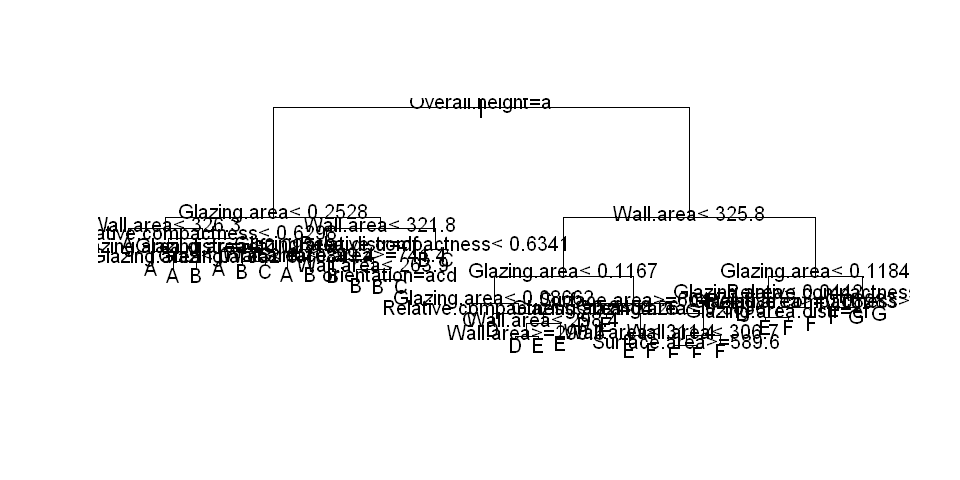

In [36]:
tree.dis=rpart(Energy.efficiency~.,data=datappq,parms=list(split="information"),cp=0.001)
plot(tree.dis) 
text(tree.dis)

**Procédure d'élagage par validation croisée**

In [66]:
trctrl <- trainControl(method = "cv", number = 10)
set.seed(13)
dtree_fit <- train(Energy.efficiency~.,data=datappq, method = "rpart",
                   parms = list(split = "information"),
                   trControl=trctrl,
                   tuneLength = 10)

In [67]:
dtree_fit

CART 

614 samples
  7 predictor
  7 classes: 'A', 'B', 'C', 'D', 'E', 'F', 'G' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 553, 552, 553, 553, 553, 553, ... 
Resampling results across tuning parameters:

  cp           Accuracy   Kappa    
  0.009781791  0.6302821  0.5561135
  0.011286682  0.6106629  0.5279114
  0.013544018  0.6139680  0.5315864
  0.015801354  0.6040791  0.5182495
  0.025959368  0.5780338  0.4860446
  0.029345372  0.5715557  0.4724404
  0.038374718  0.5340598  0.4175930
  0.049661400  0.4966432  0.3692419
  0.108352144  0.4349248  0.2853138
  0.200902935  0.3349248  0.1059208

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.009781791.

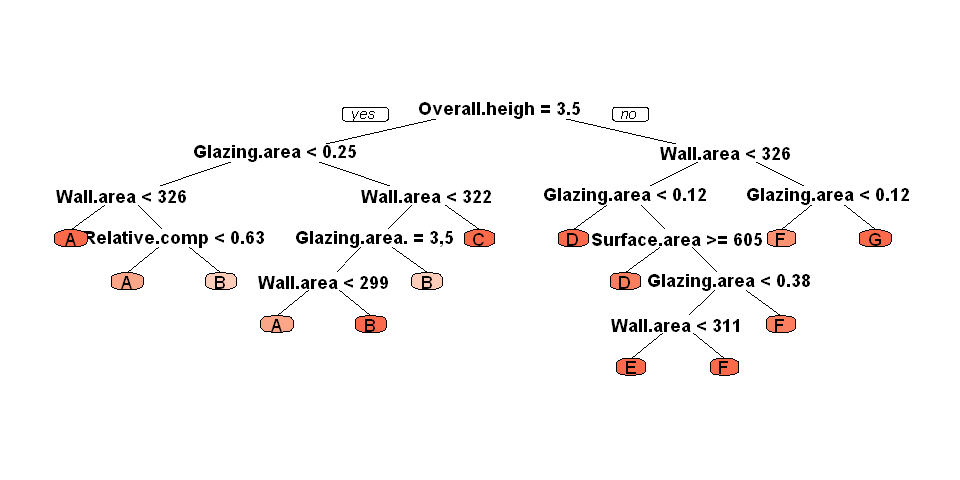

In [88]:
tree.dis=rpart(Energy.efficiency~.,data=datappq,parms=list(split="information"),
               cp=as.numeric(dtree_fit$bestTune))

prp(tree.dis, box.palette = "Reds", tweak = 1.3)

**Prévision de l'échantillon test**

In [97]:
test_pred <- predict(dtree_fit, newdata = datestq)
confusionMatrix(table(test_pred, datestq$Energy.efficiency ))

Confusion Matrix and Statistics

         
test_pred  A  B  C  D  E  F  G
        A 26  6  1  0  0  0  0
        B  7 14  5  0  0  0  0
        C  4  5 11  1  0  0  0
        D  0  2  3 12  8  2  0
        E  0  0  0  3  4  1  0
        F  0  0  0  0  6 11  3
        G  0  0  0  0  2  4 13

Overall Statistics
                                          
               Accuracy : 0.5909          
                 95% CI : (0.5089, 0.6694)
    No Information Rate : 0.2403          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5177          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: A Class: B Class: C Class: D Class: E Class: F
Sensitivity            0.7027  0.51852  0.55000  0.75000  0.20000  0.61111
Specificity            0.9402  0.90551  0.92537  0.89130  0.97015  0.93382
Pos Pred Value         0.7879  0.53846  0.52381  0.444

#### 2.1.2 Decision Tree classifier with criterion as gini index


In [99]:
treegini <- trainControl(method = "cv", number = 10)
set.seed(13)
treegini_fit <- train(Energy.efficiency~.,data=datappq, method = "rpart",
                   parms = list(split = "gini"),
                   trControl=trctrl,
                   tuneLength = 10)

In [100]:
treegini_fit

CART 

614 samples
  7 predictor
  7 classes: 'A', 'B', 'C', 'D', 'E', 'F', 'G' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 553, 552, 553, 553, 553, 553, ... 
Resampling results across tuning parameters:

  cp           Accuracy   Kappa    
  0.009781791  0.6221886  0.5466643
  0.011286682  0.6074081  0.5281210
  0.013544018  0.6058216  0.5266635
  0.015801354  0.5992915  0.5175148
  0.025959368  0.5700964  0.4807339
  0.029345372  0.5391076  0.4318791
  0.038374718  0.5209451  0.4018098
  0.049661400  0.4966432  0.3692419
  0.108352144  0.4349248  0.2853138
  0.200902935  0.3349248  0.1059208

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.009781791.

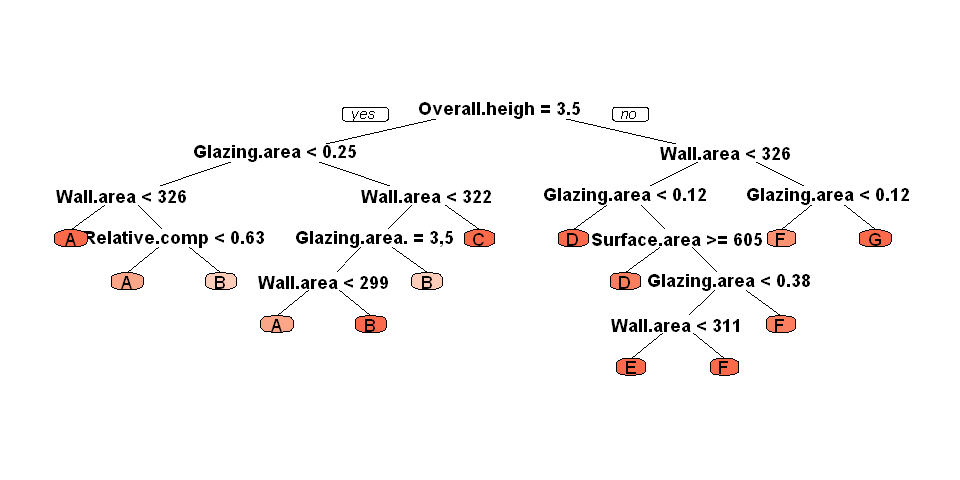

In [101]:
treegini.dis=rpart(Energy.efficiency~.,data=datappq,parms=list(split="gini"),
               cp=as.numeric(treegini_fit$bestTune))

prp(tree.dis, box.palette = "Reds", tweak = 1.3)

**Prévision de l'échantillon test**

In [102]:
test_pred <- predict(treegini_fit, newdata = datestq)
confusionMatrix(table(test_pred, datestq$Energy.efficiency ))

Confusion Matrix and Statistics

         
test_pred  A  B  C  D  E  F  G
        A 26  6  1  0  0  0  0
        B  7 14  5  0  0  0  0
        C  4  5 11  1  0  0  0
        D  0  2  3 11  8  1  0
        E  0  0  0  4  5  3  0
        F  0  0  0  0  5 10  3
        G  0  0  0  0  2  4 13

Overall Statistics
                                          
               Accuracy : 0.5844          
                 95% CI : (0.5023, 0.6632)
    No Information Rate : 0.2403          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5098          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: A Class: B Class: C Class: D Class: E Class: F
Sensitivity            0.7027  0.51852  0.55000  0.68750  0.25000  0.55556
Specificity            0.9402  0.90551  0.92537  0.89855  0.94776  0.94118
Pos Pred Value         0.7879  0.53846  0.52381  0.440

**Commentaires :** Les résultats ci-dessus montrent que le classifieur avec le critère comme *Gini index* donne 58,44% de précision pour l'ensemble de test et celui de *information gain*, 59.09%. Dans ce cas, notre classifieur avec le critère trent que le classifieur avec le critère comme *Gini index* donne 58,44% de précision pour l'ensemble de test et celui de *information gain* donne légèrement un meilleur résultat.

## 2. Cas d'un problème de classification indirecte

In [34]:
#install.packages(c("moments"))
#install.packages(c("ROCR", "mlbench", "MASS", "boot", "class", "e1071", "rpart", "partykit", 
                   #"nnet", "ipred", "gbm", "randomForest", "caret"))

library(ggpubr)
library(moments)

### 2.2. Modèle linéaire

Le premier modèle à tester est un simple modèle de régression linéaire mais, comme certaines variables sont qualitatives, il s'agit d'une analyse de covariance. D'autre part, on s'intéresse à savoir si des interactions sont à prendre en compte. Le modèle devient alors polynomial d'ordre 2 ou quadratique.

#### 2.2.1. Modèle linéaire simple

Le modèle de régression linéaire simple intégre des variables qualitatives; c'est dans ce cas une *analyse de covariance*  estimée par la fonction `aov` mieux adaptée à ce modèle.

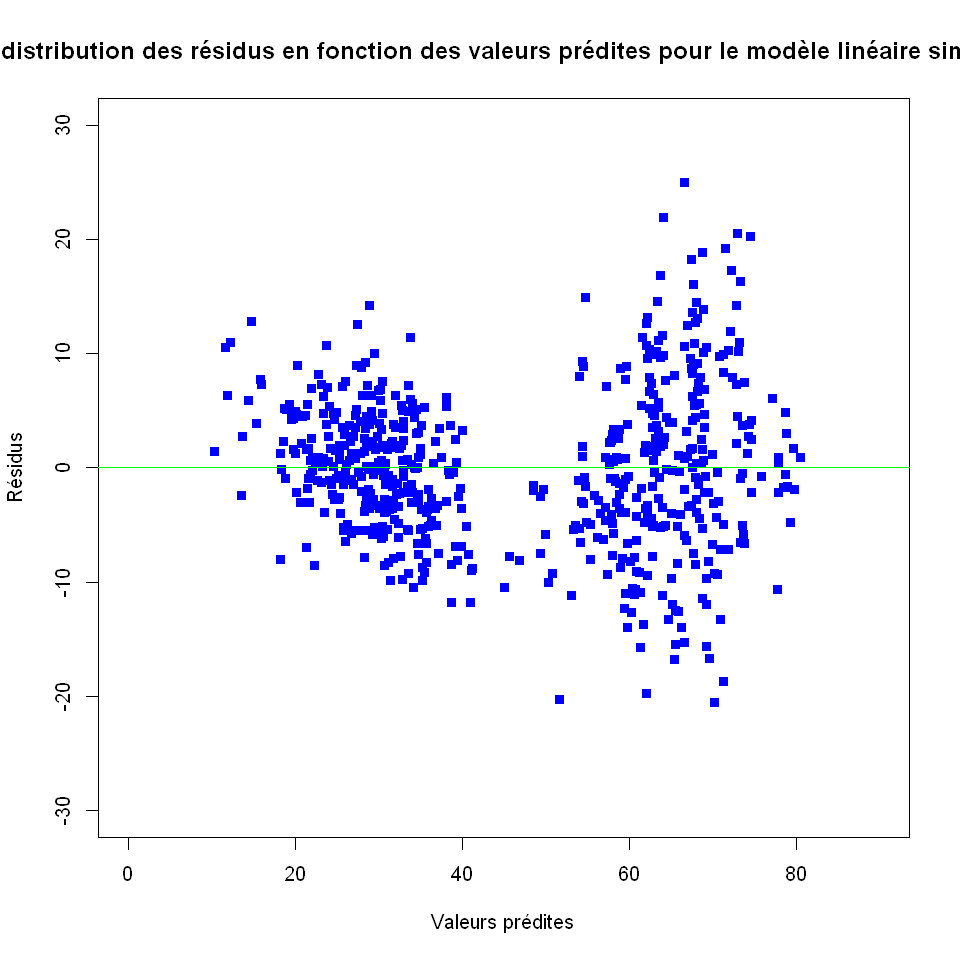

In [129]:
# estimation du modèle sans interaction
reg.lm <- aov(Energy ~ . , data = datappr)
# Extraction des résidus et des valeurs ajustées de ce modèle
res.lm <- reg.lm$residuals
fit.lm <- reg.lm$fitted.values
# graphe des résidus. 
# Définition d'une fonction pour un graphe coloré 
# et des échelles fixes sur les axes
plot.res <- function(x,y,titre="titre")
{
plot(x, y, col = "blue", xlim = c(0, 90), ylim = c(-30, 30),
ylab = "Résidus", xlab = "Valeurs prédites", main = titre, pch = 15)
# points(x2, y, col="red")
abline(h = 0, col = "green")
}
plot.res(fit.lm,res.lm,"distribution des résidus en fonction des valeurs prédites pour le modèle linéaire simple")

>**La distribution des residus est très dispersée. Le système a moins d'erreurs de prédictions quand il s'agit de batiments avec une efficacité energétique relativement bonne. Cela est matérialisé par une distribution des residus beaucoup plus concentrée autour de zero pour les valeurs d'énergie inferieures à 45.**

In [130]:
summary(reg.lm)

                      Df Sum Sq Mean Sq  F value   Pr(>F)    
Relative.compactness   1  95042   95042 2039.440  < 2e-16 ***
Surface.area           1  18517   18517  397.347  < 2e-16 ***
Wall.area              1  80080   80080 1718.366  < 2e-16 ***
Overall.height         1   7925    7925  170.053  < 2e-16 ***
orientation            3    149      50    1.065 0.363310    
Glazing.area           1  14634   14634  314.015  < 2e-16 ***
Glazing.area.distr     5   1176     235    5.048 0.000153 ***
Residuals            600  27961      47                      
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

>D'après les valeurs de p-value, les variables Relative.compactness, Surface.area, Wall.area et Glazing.area sont particulièrement importantes. Cela corrobore les etudes faites précédemment.
Evidemment, l'orientation a peu d'influence sur la prdiction. Cela concorde avec la distribution observée durant l'analyse exploratoire.

#### 2.2.2 Modèle linéaire avec pénalisation LASSO (L1)

Nous allons effectuer tout dabord une sélection de variables par régularisation L1 (LASSO)
Pour cela, traçons les différentes estimations des paramètres pour chaque valeur de pénalisation de Lambda. 

* **Affichage des chemins de régularisation**

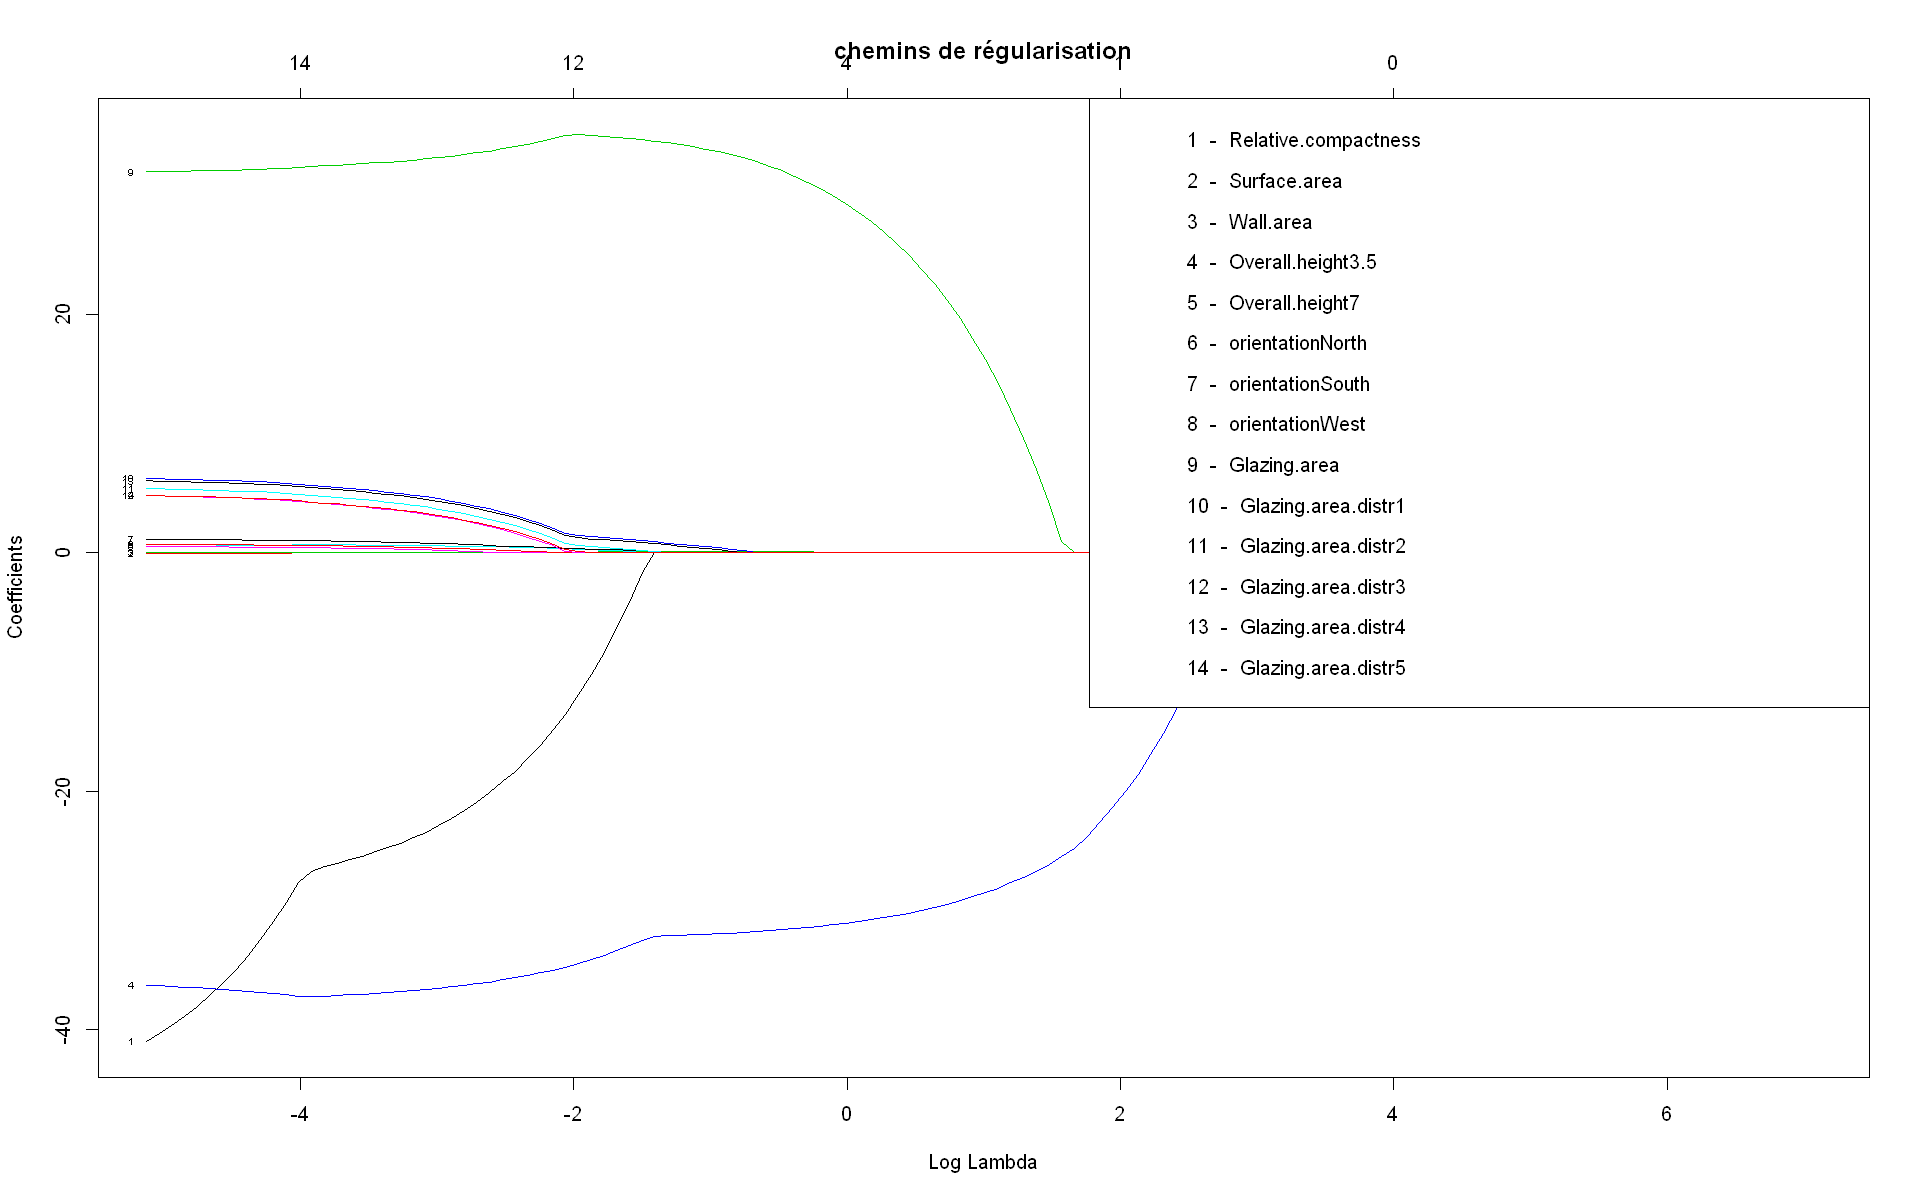

In [131]:
# avec toutes les variables (sans l'intercept), créer d'abord la matrice d'expériences 
x.mat <- model.matrix(Energy ~ . - 1, data = datappr)
reg.lasso <- glmnet(y = datappr$Energy, x = x.mat)
options(repr.plot.width = 16, repr.plot.height = 10)
plot(reg.lasso,xlim=c(-5,7), xvar = "lambda", label = TRUE, main="chemins de régularisation")
legend("topright", 
       legend = paste(1:ncol(x.mat), " - ", colnames(x.mat)))

Un zoom sur les coefficients proches de zéro permet de mieux observer leur évolution.

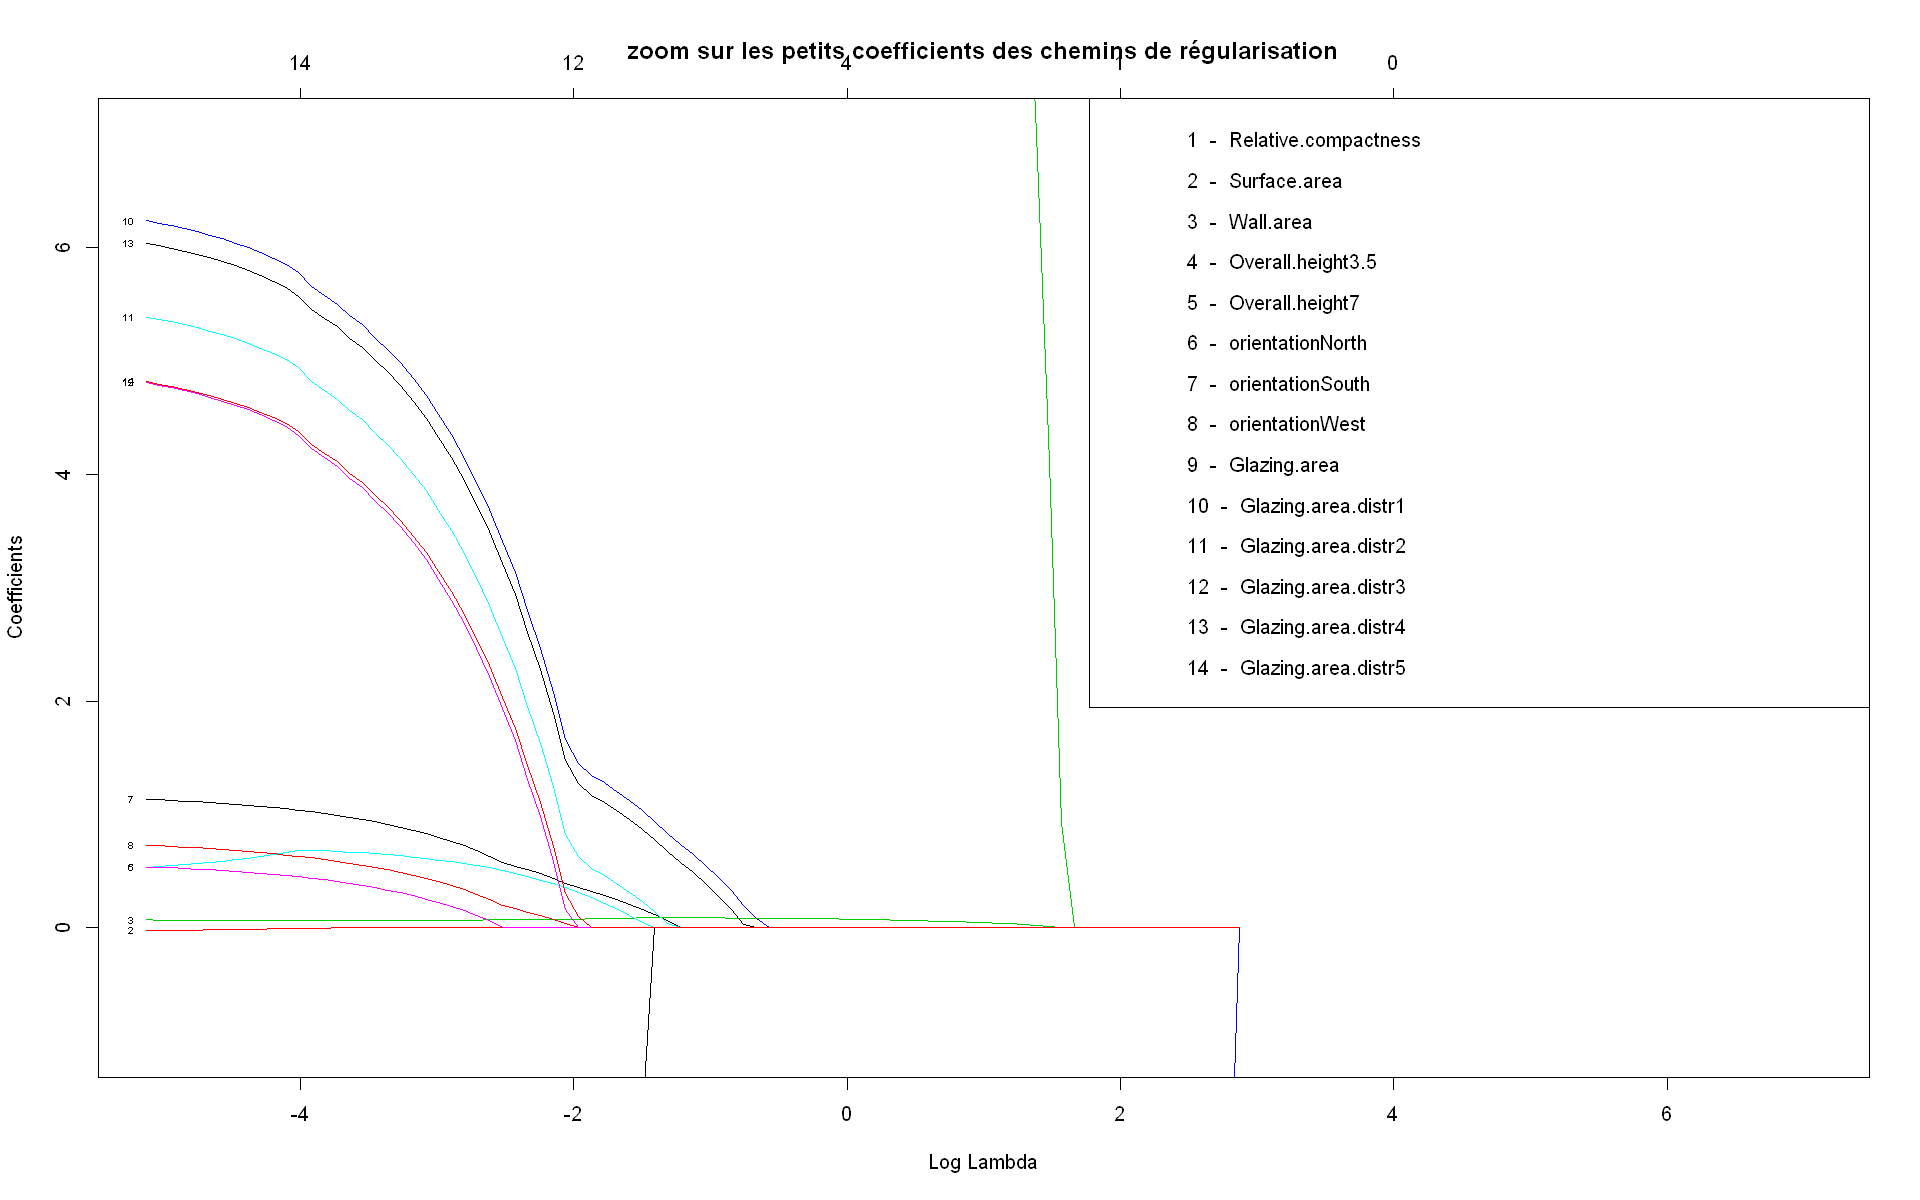

In [132]:
plot(reg.lasso,xlim=c(-5,7),ylim=c(-1,7), xvar = "lambda", label = TRUE, 
     main="zoom sur les petits coefficients des chemins de régularisation")

legend("topright", legend = paste(1:ncol(x.mat), " - ", colnames(x.mat)))

On remarque que dès qu'on introduit une penalisation un peu importante, le nombre de coéficients non nuls diminue drastiquement Il ne va rester que trois coéfficients si la lambda tend vers 1. 

* **choix du paramètre de régularisation par validation croisée**

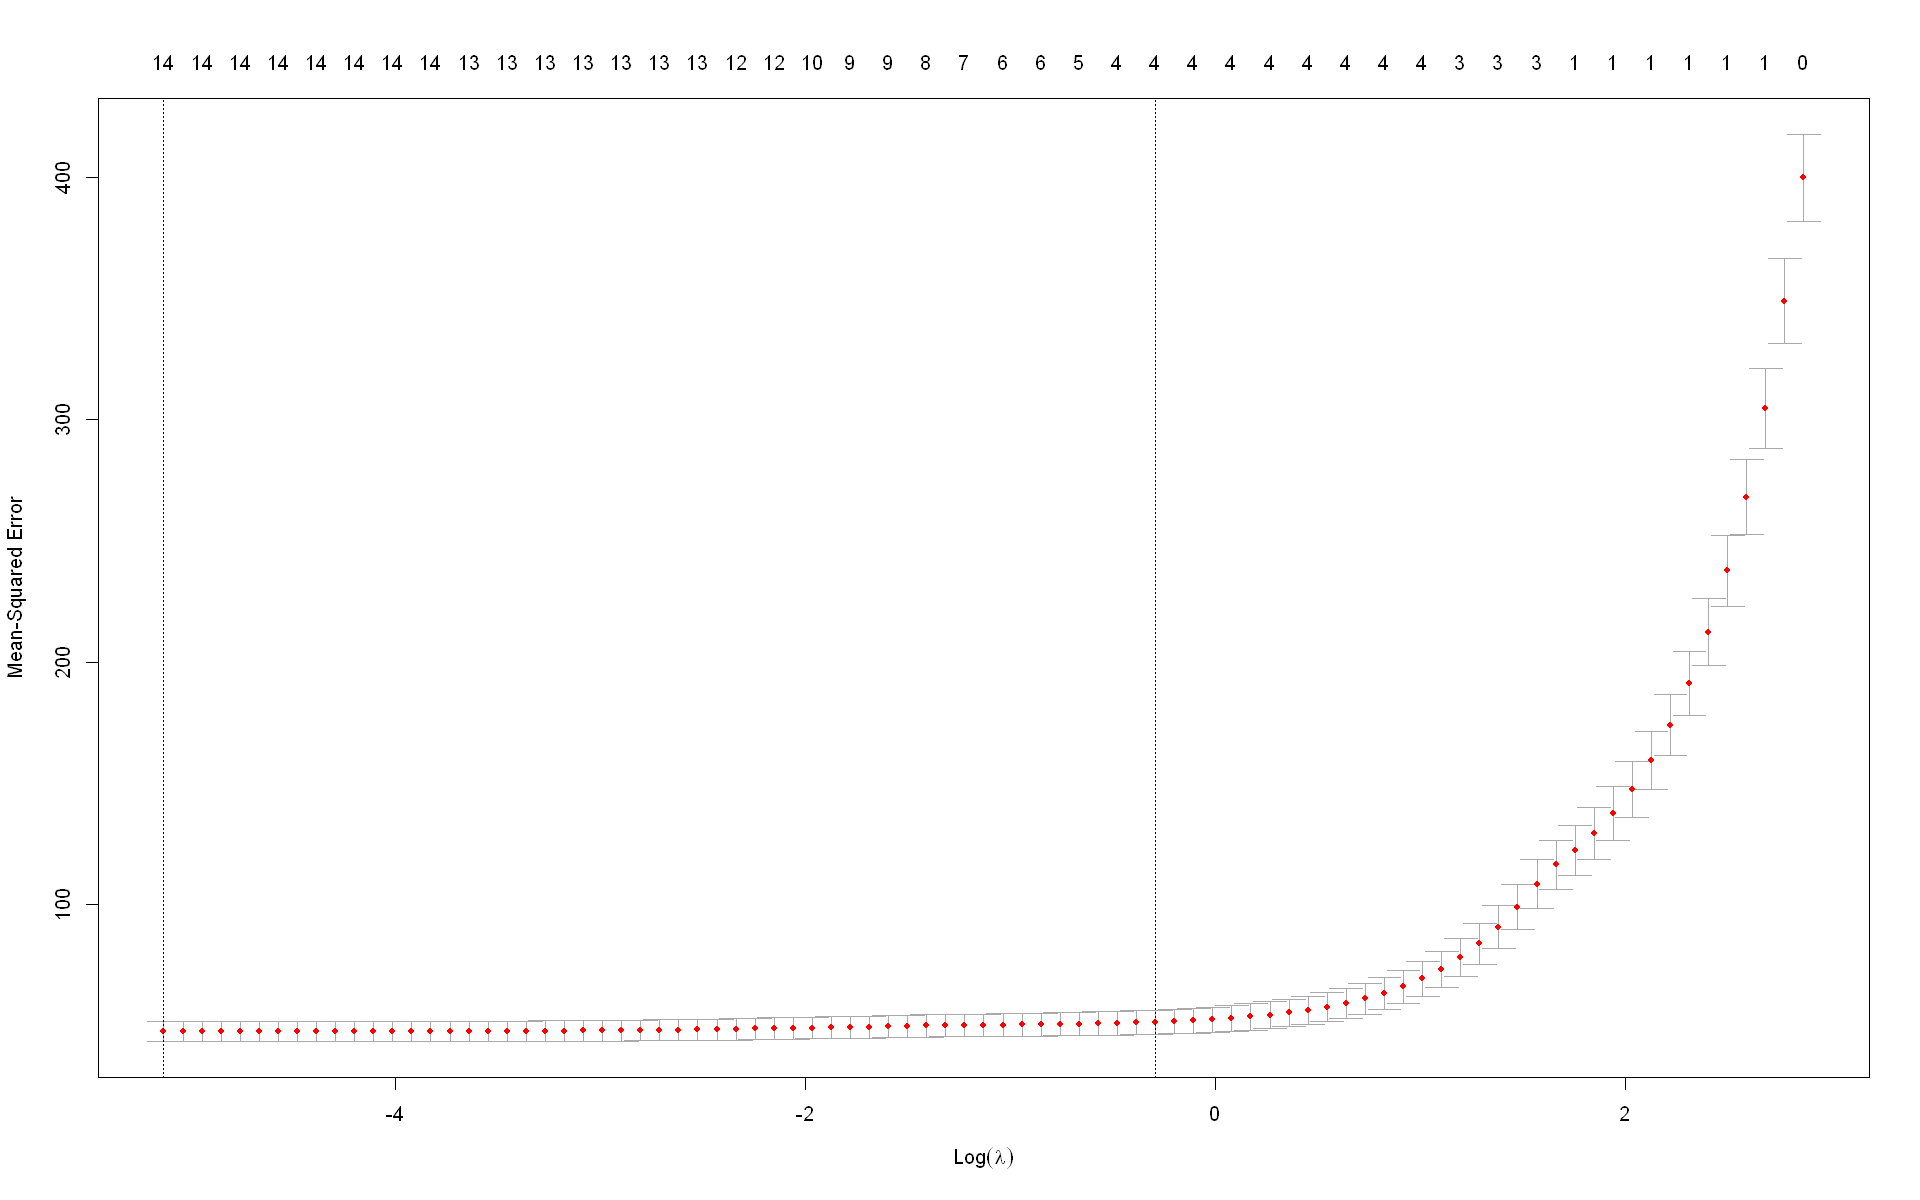

In [133]:
# choix du paramètre de régularisation par validation croisée
reg.lasso.cv <- cv.glmnet(y = datappr[, 8], x = x.mat)
plot(reg.lasso.cv)

Remarque: La courbe rouge représente les erreurs de prédictions moyennes (MSE) obtenues par validation croisée. La ligne verticale de gauche correspond au lambda pour lequel le MSE est minimal.
La ligne verticale droite représente le plus grand lambda pour lequel la borne inférieure de l'intervalle est égale au minimum du MSE.

In [134]:
# valeur estimée
paste("CV estimate of lambda :", round(reg.lasso.cv$lambda.1se, 3))
# modèle correspondant
coef(reg.lasso.cv, s = "lambda.1se")

[1] "CV estimate of lambda : 0.747"

15 x 1 sparse Matrix of class "dgCMatrix"
                                 1
(Intercept)           2.927148e+01
Relative.compactness  .           
Surface.area          .           
Wall.area             8.222785e-02
Overall.height3.5    -3.142687e+01
Overall.height7       4.384559e-14
orientationNorth      .           
orientationSouth      .           
orientationWest       .           
Glazing.area          3.110235e+01
Glazing.area.distr1   .           
Glazing.area.distr2   .           
Glazing.area.distr3   .           
Glazing.area.distr4   .           
Glazing.area.distr5   .           

**Remarque:** On obtient 4 valeurs coefficients non nuls avec **paramètre lambda.1se estimée à 0.747**. Ce qui est vérifiable sur le chemin de régularisation. Le fait que Surface.area et Relative.Compactness soient nuls peut sembler assez surprenant. Mais, cela est certainement compensé par leur relation avec la variable wall.area. En effet, la relative.compactness est correlée à la Surface.area par définition qui elle-meme est correlée à la Wall.area.


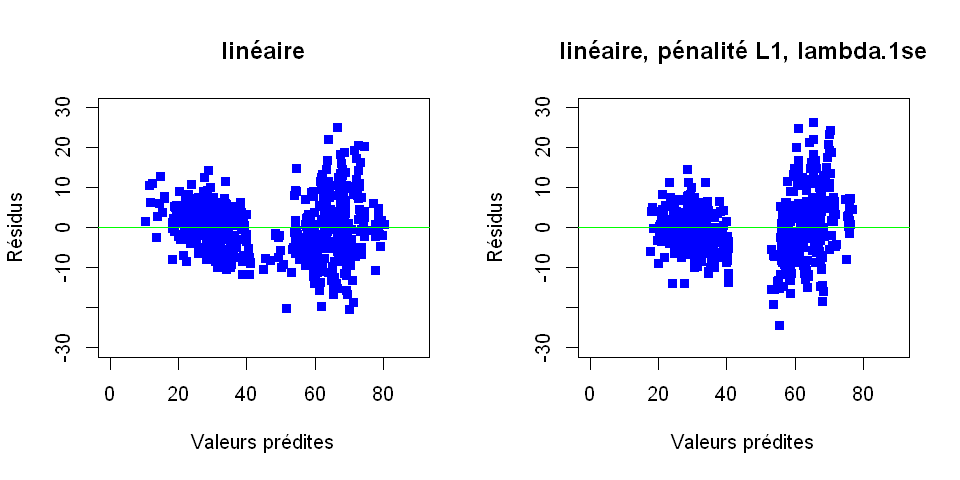

In [135]:
# Extraction des valeurs ajustées et des résidus
fit.lasso <- predict(reg.lasso.cv, s = "lambda.1se", newx = x.mat)
res.lasso <- datappr$Energy - fit.lasso
# Graphe des résidus
options(repr.plot.width = 8, repr.plot.height = 4)
par(mfrow = c(1, 2))
plot.res(fit.lm, res.lm, "linéaire")
plot.res(fit.lasso, res.lasso, "linéaire, pénalité L1, lambda.1se")

In [136]:
linear.mse <- mean(res.lm^2)
lasso.mse <- mean(res.lasso^2)

paste("linear mse:",linear.mse )
paste("lasso mse:", lasso.mse )

[1] "linear mse: 45.5396361189222"

[1] "lasso mse: 50.2738495051901"

En regardant les valeurs des mse moyen, on se rend compte qu'on perd en précision en utilisant LASSO. Ce modèle qui ne garde que 4 variables nous fait perdre en précision. On a un modèle trop simple


**A présent, qu'en est-il si on choisi la valeur minimale ?**

In [137]:
# valeur estimée
paste("CV estimate of lambda :", round(reg.lasso.cv$lambda.min, 3))
# modèle correspondant
coef(reg.lasso.cv, s = "lambda.min")

[1] "CV estimate of lambda : 0.006"

15 x 1 sparse Matrix of class "dgCMatrix"
                                1
(Intercept)           76.21400217
Relative.compactness -40.96643917
Surface.area          -0.02327979
Wall.area              0.07060094
Overall.height3.5    -36.26958347
Overall.height7        0.53706551
orientationNorth       0.53804042
orientationSouth       1.13438335
orientationWest        0.72851826
Glazing.area          31.97249063
Glazing.area.distr1    6.23997710
Glazing.area.distr2    5.38999846
Glazing.area.distr3    4.81122998
Glazing.area.distr4    6.04382560
Glazing.area.distr5    4.82002817

**Remarque**: On obtient 14 coefficients non nuls. <br>Tous ces résultats sont vérifiables sur le chemin de régularisation. On observe un grand retour de la Relative.compactness et de la Glazing area qui prennent des valeurs importantes négativement.

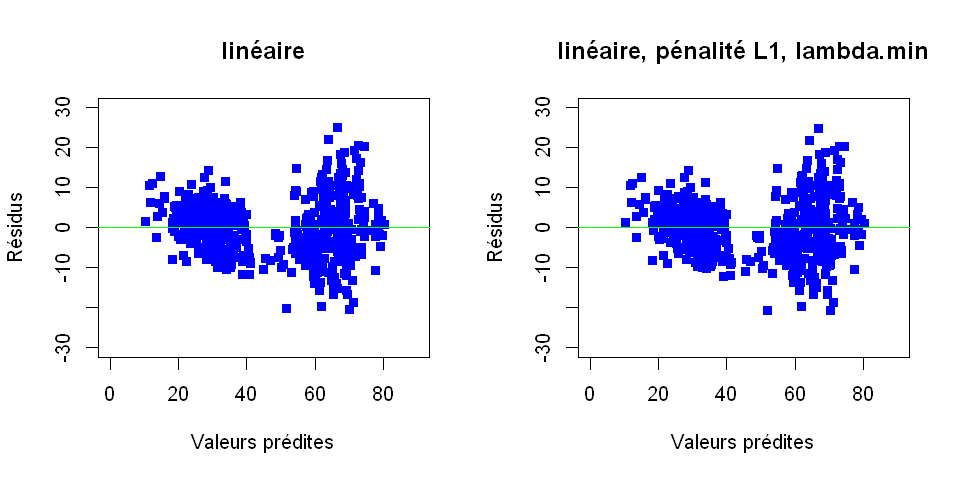

In [138]:
# Extraction des valeurs ajustées et des résidus
fit.lasso <- predict(reg.lasso.cv, s = "lambda.min", newx = x.mat)
res.lasso <- datappr$Energy - fit.lasso
# Graphe des résidus
options(repr.plot.width = 8, repr.plot.height = 4)
par(mfrow = c(1, 2))
plot.res(fit.lm, res.lm, "linéaire")
plot.res(fit.lasso, res.lasso, "linéaire, pénalité L1, lambda.min")

In [139]:
linear.mse <- mean(res.lm^2)
lasso.mse <- mean(res.lasso^2)

paste("linear mse:",linear.mse )
paste("lasso mse:", lasso.mse )

[1] "linear mse: 45.5396361189222"

[1] "lasso mse: 45.5631710763382"

La distribution est quasiment identique avec les deux modeles. Cela peut bien se comprendre car en gardant jusqu'à 10 vairables, on retombe presque dans le cas de la regression linéeaire simple non pénalisée.

#### 3.2.2. Modèle quadratique

In [140]:
# Estimation du modèle de toute interaction d'ordre 2
reg.glm <- glm(Energy ~ .^2, data = datappr)
# Recherche du meilleur modèle au sens 
# du critère d'Akaïke par méthode descendante
reg.glm.step <- step(reg.glm, direction = "backward")

Start:  AIC=4076.77
Energy ~ (Relative.compactness + Surface.area + Wall.area + Overall.height + 
    orientation + Glazing.area + Glazing.area.distr)^2

                                          Df Deviance    AIC
- Surface.area:Glazing.area.distr          5    21237 4068.2
- Relative.compactness:Glazing.area.distr  5    21267 4069.0
- orientation:Glazing.area.distr          15    22003 4069.9
- Overall.height:Glazing.area.distr        5    21340 4071.2
- orientation:Glazing.area                 3    21220 4071.7
- Wall.area:orientation                    3    21230 4072.0
- Overall.height:orientation               3    21238 4072.2
- Relative.compactness:orientation         3    21257 4072.7
- Surface.area:orientation                 3    21260 4072.8
- Wall.area:Glazing.area.distr             5    21421 4073.5
- Glazing.area:Glazing.area.distr          5    21432 4073.8
- Relative.compactness:Glazing.area        1    21189 4074.8
- Overall.height:Glazing.area              1    21191

In [141]:
# Comparer avec un modèle quadratique avec pénalité L1
x.mat2 <- model.matrix(Energy ~ .^2 - 1, data = datappr)
reg.lasso2.cv <- cv.glmnet(y = datappr[, 2], x = x.mat2)
coef(reg.lasso2.cv, s = "lambda.1se")

80 x 1 sparse Matrix of class "dgCMatrix"
                                                  1
(Intercept)                              19.4967683
Relative.compactness                      .        
Surface.area                              0.9708495
Wall.area                                 .        
Overall.height3.5                         .        
Overall.height7                           .        
orientationNorth                          .        
orientationSouth                          .        
orientationWest                           .        
Glazing.area                              .        
Glazing.area.distr1                       .        
Glazing.area.distr2                       .        
Glazing.area.distr3                       .        
Glazing.area.distr4                       .        
Glazing.area.distr5                       .        
Relative.compactness:Surface.area         .        
Relative.compactness:Wall.area            .        
Relative.compactness:O

**Remarque:** la variable Surface.area est considérée dans le cas d'un modèle quadratique avec pénalité L1.
Comparons les différentes mse.

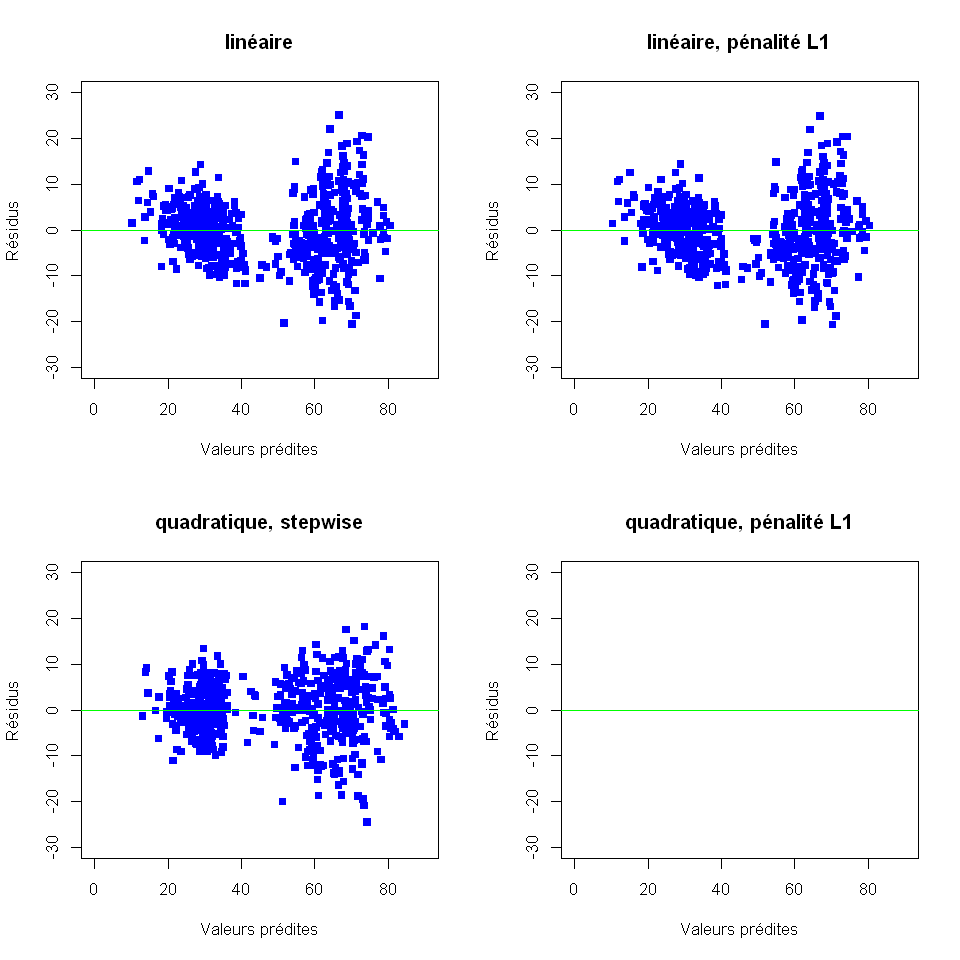

In [142]:
# Extraction des valeurs ajustées et des résidus
fit.glm <- reg.glm.step$fitted.values
res.glm <- reg.glm.step$residuals
fit.lasso2 <- predict(reg.lasso2.cv, s = "lambda.min", newx = x.mat2)
res.lasso2 <- datappr$Energy - fit.lasso2
# Graphe des résidus
options(repr.plot.width = 8, repr.plot.height = 8)
par(mfrow = c(2, 2))
plot.res(fit.lm, res.lm, "linéaire")
plot.res(fit.lasso, res.lasso, "linéaire, pénalité L1")
plot.res(fit.glm, res.glm, "quadratique, stepwise")
plot.res(fit.lasso2, res.lasso2, "quadratique, pénalité L1")

Affichons les mse pour des fins de comparaison.

In [143]:
linear.mse <- mean(res.lm^2)
lasso.mse <- mean(res.lasso^2)
quad.mse<- mean(res.glm^2)
quad.lasso.mse<- mean(res.lasso2^2)
paste("linear mse:",linear.mse )
paste("lasso mse:", lasso.mse )
paste("quadratic mse:",quad.mse )
paste("quadratic lasso mse:", quad.lasso.mse )

[1] "linear mse: 45.5396361189222"

[1] "lasso mse: 45.5631710763382"

[1] "quadratic mse: 37.5336956729364"

[1] "quadratic lasso mse: 396628.984776759"

On est clairement un modèle sous-appris dans le cas du modèle quadratique LASSO avec une valeur moyenne trop grande. Cela n'est pas surprenant quand on voit que le modèle ne se base que sur la Surface.area.<br>
**Le modèle le plus acceptable parmi tous ces quatre est le modèle quadratique simple si on se base sur le MSE.**

#### 3.2.3.Test des modèles

* **Prédictions de Energy**

In [169]:
pred.linear <- predict(reg.lm, newdata= datestr)

pred.linear.class <- cut(pred.linear, breaks = c(-1, 30, 35, 45, 55, 65, 75, 100),  
                         labels = c("A", "B", "C", "D", "E", "F", "G"))

datest.mat <- model.matrix(Energy ~ . - 1, data = datestr)
pred.lasso.lm <- predict(reg.lasso.cv, s = "lambda.min", newx = datest.mat)      #  modèle linéaire avec pénalité L1

pred.lasso.lm.class <- cut(pred.lasso.lm, breaks = c(-1, 30, 35, 45, 55, 65, 75, 100),  
                         labels = c("A", "B", "C", "D", "E", "F", "G"))

pred.glm.quad <- predict(reg.glm.step, newdata = datestr)                    # modèle quadratique de toute interaction d'ordre 2

pred.glm.quad.class <- cut(pred.glm.quad, breaks = c(-1, 30, 35, 45, 55, 65, 75, 100),  
                         labels = c("A", "B", "C", "D", "E", "F", "G"))

datest.mat2 <- model.matrix(Energy ~ .^2 - 1, data = datestr)
pred.lasso2.quad <- predict(reg.lasso2.cv, s = "lambda.min", newx = datest.mat2)  #  modèle quadratique avec pénalité L1

pred.lasso2.quad.class <- cut(pred.lasso2.quad, breaks = c(-1, 30, 35, 45, 55, 65, 75, 100),  
                         labels = c("A", "B", "C", "D", "E", "F", "G"))


* **Erreur quadratique moyenne de prédiction (MSE)**

In [170]:

paste("linear mse:",sum((pred.linear - datestr[, "Energy"])^2) / nrow(datestr) )

paste("linear lasso mse:", sum((pred.lasso.lm - datestr[, "Energy"])^2) / nrow(datestr) )

paste("quadratic mse:",sum((pred.glm.quad  - datestr[, "Energy"])^2) / nrow(datestr) )

paste("quadratic lasso mse:", sum((pred.lasso2.quad - datestr[, "Energy"])^2) / nrow(datestr) )

[1] "linear mse: 51.838832201056"

[1] "linear lasso mse: 52.4697977616122"

[1] "quadratic mse: 46.8681536592933"

[1] "quadratic lasso mse: 412165.70504055"

Durant la phase de test, on observe également que les modèles quadratiques avec toutes les intéractions et le modèle linéaire simple sont les plus adaptés. Les modèles avec pénalisation LASSO sont tous sous-appris.

Essayons tout de meme de tracer les matrices de confusion pour voir l'étendue des erreurs de prédiction

* **Matrices de confusion**

In [201]:
install.packages("cvms")

also installing the dependencies 'TMB', 'cubelyr', 'broom.mixed', 'checkmate', 'MuMIn'



package 'TMB' successfully unpacked and MD5 sums checked
package 'cubelyr' successfully unpacked and MD5 sums checked
package 'broom.mixed' successfully unpacked and MD5 sums checked
package 'checkmate' successfully unpacked and MD5 sums checked
package 'MuMIn' successfully unpacked and MD5 sums checked
package 'cvms' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\salim\AppData\Local\Temp\RtmpYdI075\downloaded_packages


In [202]:
library(caret)
nrowA=nrow(datestq[datestq["Energy.efficiency"]=="A",])
nrowB=nrow(datestq[datestq["Energy.efficiency"]=="B",])
nrowC=nrow(datestq[datestq["Energy.efficiency"]=="C",])
nrowD=nrow(datestq[datestq["Energy.efficiency"]=="D",])
nrowE=nrow(datestq[datestq["Energy.efficiency"]=="E",])
nrowF=nrow(datestq[datestq["Energy.efficiency"]=="F",])
nrowG=nrow(datestq[datestq["Energy.efficiency"]=="G",])

Warning message:
"package 'cvms' was built under R version 3.6.3"

In [228]:
paste("linear simple:")
confmat <-table(pred.linear.class, datestq$Energy.efficiency)
confmat[,"A"] <- confmat[,'A']/nrowA
confmat[,"B"] <- confmat[,'B']/nrowB
confmat[,"C"] <- confmat[,'C']/nrowC
confmat[,"D"] <- confmat[,'D']/nrowD
confmat[,"E"] <- confmat[,'E']/nrowE
confmat[,"F"] <- confmat[,'F']/nrowF
confmat[,"G"] <- confmat[,'G']/nrowG
round(confmat,2)

paste("linear lasso:")
confmat <-table(pred.lasso.lm.class, datestq$Energy.efficiency)
confmat[,"A"] <- confmat[,'A']/nrowA
confmat[,"B"] <- confmat[,'B']/nrowB
confmat[,"C"] <- confmat[,'C']/nrowC
confmat[,"D"] <- confmat[,'D']/nrowD
confmat[,"E"] <- confmat[,'E']/nrowE
confmat[,"F"] <- confmat[,'F']/nrowF
confmat[,"G"] <- confmat[,'G']/nrowG
round(confmat,2)

paste("quadratic simple:")
confmat <-table(pred.glm.quad.class, datestq$Energy.efficiency)
confmat[,"B"] <- confmat[,'B']/nrowB
confmat[,"C"] <- confmat[,'C']/nrowC
confmat[,"D"] <- confmat[,'D']/nrowD
confmat[,"E"] <- confmat[,'E']/nrowE
confmat[,"F"] <- confmat[,'F']/nrowF
confmat[,"G"] <- confmat[,'G']/nrowG
round(confmat,2)

paste("quadratic lasso :")
confmat <-table(pred.lasso2.quad.class, datestq$Energy.efficiency)
confmat[,"A"] <- confmat[,'A']/nrowA
confmat[,"B"] <- confmat[,'B']/nrowB
confmat[,"C"] <- confmat[,'C']/nrowC
confmat[,"D"] <- confmat[,'D']/nrowD
confmat[,"E"] <- confmat[,'E']/nrowE
confmat[,"F"] <- confmat[,'F']/nrowF
confmat[,"G"] <- confmat[,'G']/nrowG
round(confmat,2)


[1] "linear simple:"

                 
pred.linear.class    A    B    C    D    E    F    G
                A 0.62 0.33 0.00 0.00 0.00 0.00 0.00
                B 0.27 0.26 0.20 0.00 0.00 0.00 0.00
                C 0.11 0.33 0.65 0.06 0.00 0.00 0.00
                D 0.00 0.07 0.05 0.12 0.00 0.00 0.00
                E 0.00 0.00 0.10 0.62 0.55 0.39 0.12
                F 0.00 0.00 0.00 0.19 0.45 0.56 0.56
                G 0.00 0.00 0.00 0.00 0.00 0.06 0.31

[1] "linear lasso:"

                   
pred.lasso.lm.class    A    B    C    D    E    F    G
                  A 0.62 0.33 0.00 0.00 0.00 0.00 0.00
                  B 0.24 0.26 0.20 0.00 0.00 0.00 0.00
                  C 0.14 0.33 0.65 0.06 0.00 0.00 0.00
                  D 0.00 0.07 0.05 0.19 0.00 0.00 0.00
                  E 0.00 0.00 0.10 0.56 0.55 0.39 0.12
                  F 0.00 0.00 0.00 0.19 0.45 0.61 0.56
                  G 0.00 0.00 0.00 0.00 0.00 0.00 0.31

[1] "quadratic simple:"

                   
pred.glm.quad.class     A     B     C     D     E     F     G
                  A 21.00  0.37  0.05  0.00  0.00  0.00  0.00
                  B 15.00  0.48  0.55  0.06  0.00  0.00  0.00
                  C  1.00  0.11  0.25  0.06  0.00  0.00  0.00
                  D  0.00  0.04  0.10  0.25  0.20  0.00  0.00
                  E  0.00  0.00  0.05  0.31  0.30  0.22  0.06
                  F  0.00  0.00  0.00  0.31  0.50  0.67  0.44
                  G  0.00  0.00  0.00  0.00  0.00  0.11  0.50

[1] "quadratic lasso :"

                      
pred.lasso2.quad.class A B C D E F G
                     A 0 0 0 0 0 0 0
                     B 0 0 0 0 0 0 0
                     C 0 0 0 0 0 0 0
                     D 0 0 0 0 0 0 0
                     E 0 0 0 0 0 0 0
                     F 0 0 0 0 0 0 0
                     G 0 0 0 0 0 0 0

On remarque, avec la matrice de confusion, que le modèle lasso sans intéraction a les meilleures performances bien que les MSE des modèles linéaire et quadratique sans pénalisation soit plus faibles. Cela peut bien se comprendre étant donné que les seuils entre les classes ne sont pas larges. Par ailleurs, la MSE ne nous dit pas si la valeur est sous-évaluée ou sur-évaluée.

### 3.3. Arbre de décision

#### 3.3.1 Estimation et élagage de l'arbre de régression

In [231]:
head(datappq)

,Relative.compactness,Surface.area,Wall.area,Overall.height,orientation,Glazing.area,Glazing.area.distr,Energy.efficiency
2,0.9835473,519.8724,299.7763,7,East,0.000000e+00,0,B
3,0.9794535,516.1912,303.3744,7,South,0.000000e+00,0,C
4,0.9777325,518.9241,292.8122,7,West,9.554434e-06,0,C
6,0.8909102,558.6037,314.9162,7,East,0.000000e+00,0,C
7,0.9031505,559.7491,320.9447,7,South,0.000000e+00,0,C
8,0.8986191,568.6171,322.6710,7,West,0.000000e+00,0,C


In [235]:
library(rpart) # chargement de la librairie
tree.reg=rpart(Energy~.,data=datappr,control=rpart.control(cp=0.001))

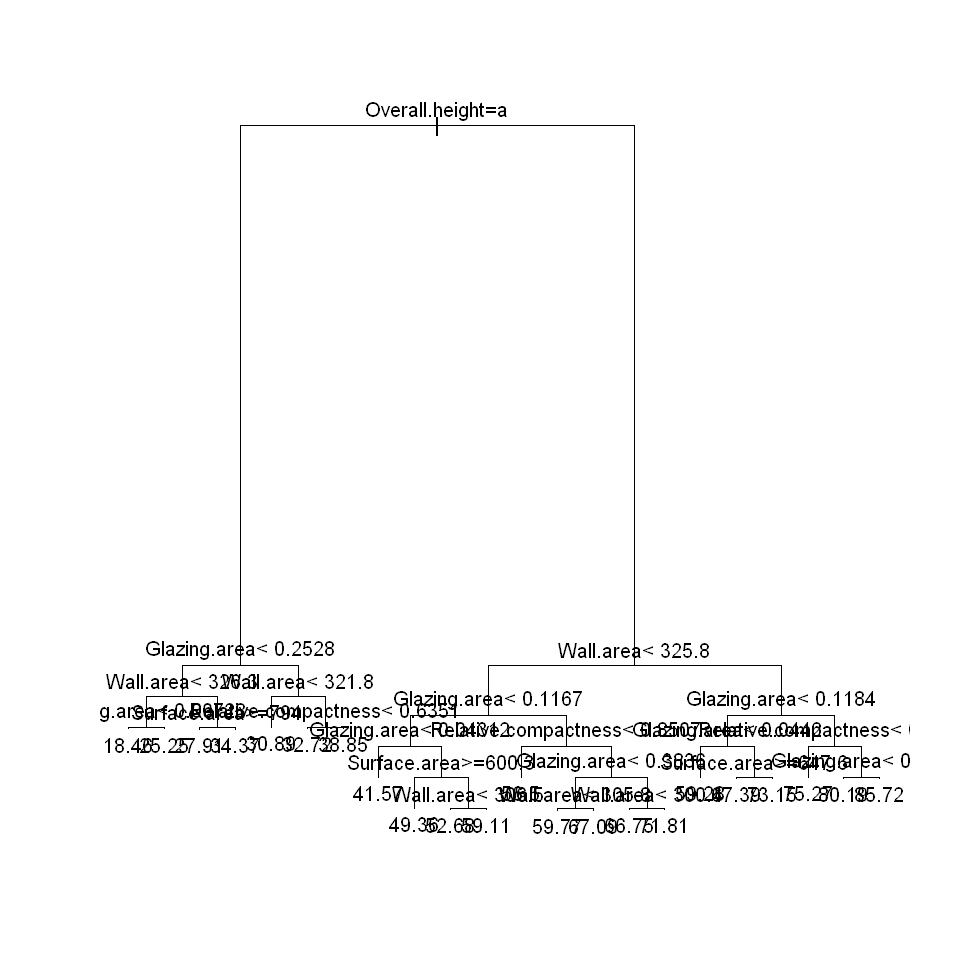

In [237]:
plot(tree.reg)
text(tree.reg)

L'arbre est illisible et présente trop de feuilles pour une bonne prévision (sur-apprentissage), il est nécessaire d'en réduire le nombre par élagage. Les commandes suivantes calculent les prévisions obtenues par  validation croisée *10-fold* pour chaque arbre élagué suivant les valeurs successives du coefficient de complexité. La séquence de ces valeurs est implicitement celle fournit par `rpart`. 

In [238]:
xmat=xpred.rpart(tree.reg)
xerr=(xmat-datappr[,"Energy"])^2
CVerr=apply(xerr,2,sum)
CVerr  #    CP           erreur

0.890125786 0.237879032 0.046671413 0.018814555 0.011168377 0.008843615 
  246114.34    54394.68    37615.43    30033.63    29286.57    25936.96 
0.007365613 0.006280675 0.004822902 0.003753782 0.003110456 0.002857528 
   25469.93    22827.59    22268.16    20989.87    20571.81    19705.63 
0.002721551 0.002687408 0.002494624 0.001880411 0.001448209 0.001314070 
   19792.96    19792.96    19243.33    18459.64    18204.32    17870.89 
0.001131601 0.001016529 0.001005598 
   17125.99    17229.30    17252.65

Cherchons la valeur de `cp` correspondant à la plus petite erreur puis l'utiliser la construction del'arbre.

In [239]:
as.numeric(attributes(which.min(CVerr))$names)

[1] 0.001131601

In [240]:
tree.reg=rpart(Energy~.,data=datappr,control=rpart.control(cp=as.numeric(attributes(which.min(CVerr))$names)))

Construction graphique de l'arbre de l'arbre avec la librairie partykit

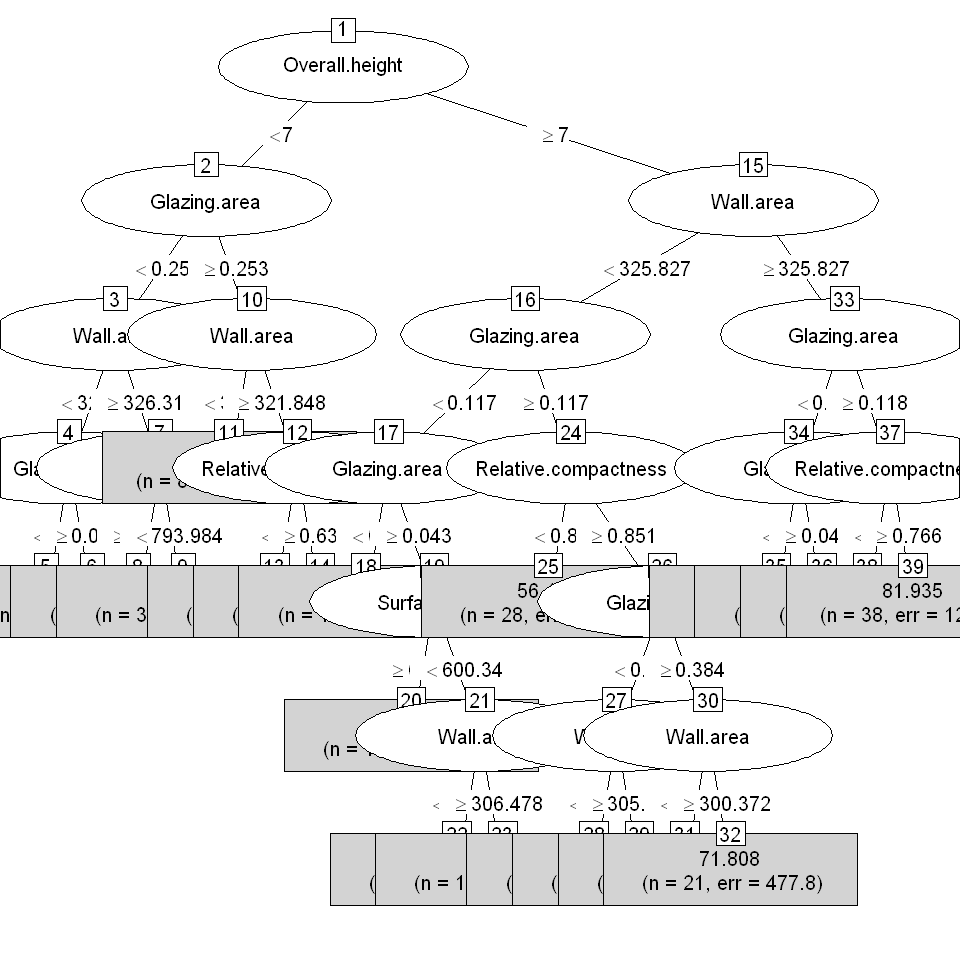

In [241]:
library(partykit)
plot(as.party(tree.reg), type="simple")

Interpretation : 
Les variables qui contribuent le plus à l'interprétation sont : Relative.compactness, Surface.area, Wall.area et Glazing.area. 


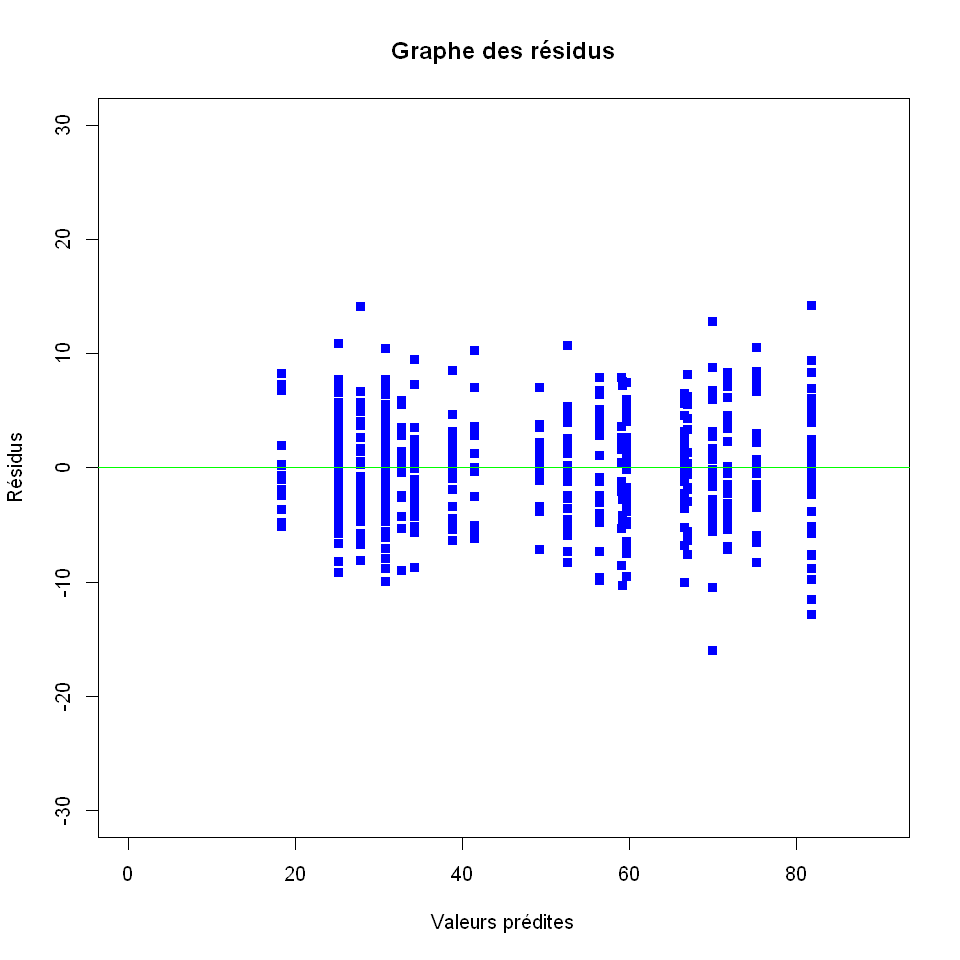

In [249]:
#Graphe des résidus

fit.tree=predict(tree.reg)
res.tree=fit.tree-datappr[,"Energy"]
plot.res(fit.tree,res.tree, titre="Graphe des résidus")

#### Interpretation :

Nous constatons que nos residus ne sont pas uniformement repartis et nous informe sur l'heteroscédasticité des données.Nous pouvons dire que la structure particulière de ce graphe est due à la non linéairité des données et que ce modèle n'est pas adapté pour nos données.

In [250]:
# Calcul des prévisions sur les données d'entrainement
fit.tree=predict(tree.reg)
predrain.treer=predict(tree.reg,newdata=datappr)
#pred.treer=predict(tree.reg,newdata=datappr)
#pred.treeq=predict(tree.dis,newdata=datestq,type="class") 
# Erreur quadratique moyenne de prévision en régression
MSE = sum((predrain.treer-datappr[,"Energy"])^2)/nrow(datappr)

MSE

[1] 19.26456

#### 3.3.2. Prévision de l'échantillon test

* **MSE**

In [251]:
# Calcul des prévisions
pred.treer=predict(tree.reg,newdata=datestr)
#pred.treeq=predict(tree.dis,newdata=datestq,type="class") 
# Erreur quadratique moyenne de prévision en régression
sum((pred.treer-datestr[,"Energy"])^2)/nrow(datestr)

[1] 32.72995

* **Matrice de confusion**

In [257]:
pred.treer.class <- cut(pred.treer, breaks = c(-1, 30, 35, 45, 55, 65, 75, 100),  
                         labels = c("A", "B", "C", "D", "E", "F", "G"))
paste("Decision Tree Confusion matrix:")
confmat <-table(data=pred.treer.class, reference=datestq$Energy.efficiency)
confmat[,"A"] <- confmat[,'A']/nrowA
confmat[,"B"] <- confmat[,'B']/nrowB
confmat[,"C"] <- confmat[,'C']/nrowC
confmat[,"D"] <- confmat[,'D']/nrowD
confmat[,"E"] <- confmat[,'E']/nrowE
confmat[,"F"] <- confmat[,'F']/nrowF
confmat[,"G"] <- confmat[,'G']/nrowG
round(confmat,2)

[1] "Decision Tree Confusion matrix:"

    reference
data    A    B    C    D    E    F    G
   A 0.70 0.22 0.05 0.00 0.00 0.00 0.00
   B 0.30 0.67 0.55 0.00 0.00 0.00 0.00
   C 0.00 0.11 0.30 0.12 0.00 0.00 0.00
   D 0.00 0.00 0.10 0.38 0.05 0.00 0.00
   E 0.00 0.00 0.00 0.50 0.65 0.17 0.00
   F 0.00 0.00 0.00 0.00 0.20 0.61 0.19
   G 0.00 0.00 0.00 0.00 0.10 0.22 0.81

**On observe de bien meilleures performances avec l'arbre de décision. <br>Cependant, le modèle a de grandes difficultés à prédire les classe C et D. Pour la classe C on a des une sous-évaluation de la Energy du batiment;ce qui fait que on lui predit une bonne efficacité énergétique (B). A contrario, les batiments de classe D n'ont pas une bonne cote. Ils se retrouvent dans la classe F dans 50% des cas.**